<a href="https://colab.research.google.com/github/johnitodo/Cardio-GoodFitness/blob/main/Cars_4_U.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
#Loading in the dataset
df = pd.read_csv('used_cars_data-1.csv')

In [ ]:
#Getting a sample of the dataset
df.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6707,6707,Hyundai i10 Magna,Chennai,2007,73000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,10.25,NaN
3834,3834,BMW X1 sDrive 20d Exclusive,Pune,2014,54385,Diesel,Automatic,Second,15.06 kmpl,1995 CC,177 bhp,5.0,48.18,17.00
6056,6056,Hyundai Creta 1.6 SX Plus Dual Tone Petrol,Bangalore,2016,13000,Petrol,Manual,First,15.29 kmpl,1591 CC,121.3 bhp,5.0,16.06,NaN
2144,2144,Ford Endeavour 3.0L 4X4 AT,Mumbai,2010,78000,Diesel,Automatic,Second,11.4 kmpl,2953 CC,153.86 bhp,7.0,35.29,5.34
5869,5869,Maruti Wagon R VXI BS IV,Kolkata,2011,37000,Petrol,Manual,Second,18.9 kmpl,998 CC,67.1 bhp,5.0,5.51,2.10


In [ ]:
#viewing the number of rows and columns
df.shape

(7253, 14)

In [ ]:
#Getting the descriptive statistics of the dataset
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


In [ ]:
#Checking for null values
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

- We have null values in Mileage. Engine, Power, Seats and price columns
- Mileage  missing               2
- Engine   missing              46
- Power    missing             175
- Seats    missing              53
- Price    missing            1234

## Data Cleaning

### Name Column

It is observed that the vehicle names are comprised of both the brand name and the model, This looks very cumbersome so we will start by seperating them into vehicle brand and vehicle model. We will save are vehicle brand as Name.

In [ ]:
#seperating the brand from model
df[['Vehicle_Brand','Vehicle_Model']] = df.Name.str.split(n=1,expand=True)

In [ ]:
#assigning the brand and model names 
Brand_name=df['Vehicle_Brand'].unique()
Model=df['Vehicle_Model'].unique()

In [ ]:
Brand_name

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

We observed that:
- Isusu appears twice and with one in capital letter.
- Landrover is spell as land

In [ ]:
#replacing with the proper brand spelling
df['Vehicle_Brand']=df['Vehicle_Brand'].replace('Land','Land_Rover') 
df['Vehicle_Brand']=df['Vehicle_Brand'].replace('ISUZU','Isuzu')  

In [ ]:
df['Vehicle_Brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            506
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          330
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land_Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Smart               1
Ambassador          1
Lamborghini         1
Name: Vehicle_Brand, dtype: int64

In [ ]:
# set threshold to 1000
threshold = 150

# get the value count of platforms
val_c = df["Vehicle_Brand"].value_counts()


# filter the platforms to only those with at least 1000 occurrence
vehicle_list = val_c[val_c.values >= threshold].index.tolist()

In [ ]:
vehicle_val = []

for i in range(df.shape[0]):  # iterate over all rows in data
    txt = df.Vehicle_Brand.values[i]  # getting the values in platform column
    flag = 0  # flag variable
    for item in vehicle_list:  # iterate over the list of platform considered
        if item in txt and flag == 0:  # checking if studio name is in the row
            vehicle_val.append(item)
            flag = 1
    if flag == 0:  # if the row values is different from the list of platforms considered
        vehicle_val.append("Others")

In [ ]:
df["Most_Brand"] = vehicle_val

### Location 

In [ ]:
df['Location'].value_counts()

Mumbai        948
Hyderabad     875
Coimbatore    772
Kochi         772
Pune          764
Delhi         660
Kolkata       654
Chennai       590
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

## Price

Here we have 1234 milling values. We will address this by filling the average(mean) value of the similar vehicles in the same group.

In [ ]:
#empty list to contain the mean Price of Cars for each brand Brand
Mean1=[] 
for i in range(len(Brand_name)):
    x=df['Price'][df['Vehicle_Brand']==Brand_name[i]].mean()
    Mean1.append(x)

In [ ]:
#empty list to contain the mean Price of Cars for each model
Mean2=[] 
for i in range(len(Model)):
    x=df['Price'][df['Vehicle_Model']==Model[i]].mean()
    Mean2.append(x)

In [ ]:
#replacing the missing values with 0.0 so we can perform other operations
df['Price']= df['Price'].fillna(0.0) 

In [ ]:

for i in range(len(df)):  #running a loop to check every row in df dataset
    if df.Price[i]==0.00:
        for j in range(len(Model)):  
            if df.Vehicle_Model[i]==Model[j]:  #Comparing the Car model  names in both datasets
                df.Price[i]=Mean2[j]  #replacing the Price of the car with the median price of its subsequent model
            

C:\Users\Admin\AppData\Local\Temp\ipykernel_31256\2413774727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Price[i]=Mean2[j]  #replacing the Price of the car with the median price of its subsequent model


In [ ]:
df['Price']= df['Price'].fillna(0.0) #replacing the missing values with float 0.0
for i in range(len(df)):  #running a loop to check every row in df dataset
    if df.Price[i]==0.00:
        for j in range(len(Brand_name)):  
            if df.Vehicle_Brand[i]==Brand_name[j]:  #Comparing the brand names in both datasets
                df.Price[i]=Mean1[j]     #replacing with corresponding missing values



C:\Users\Admin\AppData\Local\Temp\ipykernel_31256\1312140940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Price[i]=Mean1[j]     #replacing with corresponding missing values


In [ ]:
df[df['Price'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model
6216,6216,Hindustan Motors Contessa 2.0 DSL,Pune,1996,65000,Diesel,Manual,Second,14.1 kmpl,1995 CC,NaN,5.0,11.3,NaN,Hindustan,Motors Contessa 2.0 DSL
7067,7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.2 kmpl,1389 CC,88 bhp,5.0,11.3,NaN,OpelCorsa,1.4Gsi


It is observe that there are 2 more vehicles with that are not yet filled and this is because they dont have other members in their group. We will drop such vehicles from the dataset


In [ ]:
#Dropping the vehicles without a group
df.dropna(subset = 'Price', axis=0, inplace = True)

df.reset_index(drop = True, inplace = True)

### Mileage 

mileage is in a string format, which will not serve our model building. we will strip-off the object values, save it as millage and caste our it into a float. also our milleage unit is in km/kg and kmpl, we need to convert it to a single unit of kmpl by multiplying km/kg by 1.4

In [ ]:
mil = df['Mileage'].str.split(' ', expand= True)
df['Mileage'] = mil[0]
df['Mil_unit'] = mil[1]
df['Mileage'] = df['Mileage'].astype(float)

In [ ]:
#converting to kmpl
df.loc[(df['Mil_unit']== 'km/kg') & (df['Mileage']) & (df['Fuel_Type']), 'Mileage'] = df.loc[(df['Mil_unit']== 'km/kg') & (df['Mileage']) & (df['Fuel_Type']), 'Mileage']*1.4

In [ ]:
#Dropping the vehicles without a group
df.dropna(subset = 'Mileage', axis=0, inplace = True)

df.reset_index(drop = True, inplace = True)

In [ ]:
df.isnull().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                46
Power                174
Seats                 53
New_Price              0
Price                  0
Vehicle_Brand          0
Vehicle_Model          0
Mil_unit               2
dtype: int64

### Engine

We realised that we have 46 missing rows for engine. we will research each vehicle with a missing row and fill up the missing information accordingly using information from this car review website https://www.cardekho.com.

In [ ]:
df[(df['Name']=='Honda City 1.5 GXI') & (df['Engine'].isnull())] 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,13.58,2.95,Honda,City 1.5 GXI,kmpl
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,13.58,1.50,Honda,City 1.5 GXI,kmpl
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,13.58,1.85,Honda,City 1.5 GXI,kmpl


In [ ]:
df[(df['Name']=='Honda City 1.5 GXI')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,13.58,2.95,Honda,City 1.5 GXI,kmpl
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,13.58,1.50,Honda,City 1.5 GXI,kmpl
3305,3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8,1493 CC,100 bhp,5.0,13.58,2.30,Honda,City 1.5 GXI,kmpl
4767,4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8,1493 CC,100 bhp,5.0,13.58,1.10,Honda,City 1.5 GXI,kmpl
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,13.58,1.85,Honda,City 1.5 GXI,kmpl


In [ ]:
#Filling the engine nan values
df.loc[(df['Name']=='Honda City 1.5 GXI')  & (df['Engine'].isnull()),'Engine'] = df.loc[(df['Name']=='Honda City 1.5 GXI')  & (df['Engine'].isnull()),'Engine'].fillna('1493 CC')

In [ ]:
#Filling the power nan values
df.loc[(df['Name']=='Honda City 1.5 GXI')  & (df['Power'].isnull()),'Power'] = df.loc[(df['Name']=='Honda City 1.5 GXI')  & (df['Power'].isnull()),'Power'].fillna('100 bhp')

In [ ]:
#Filling the Seats nan values
df.loc[(df['Name']=='Honda City 1.5 GXI')  & (df['Seats'].isnull()),'Seats'] = df.loc[(df['Name']=='Honda City 1.5 GXI')  & (df['Seats'].isnull()),'Seats'].fillna(5.0)

In [ ]:
#Filling the  nan values
df[(df['Name']=='Maruti Swift 1.3 VXi')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.88,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,NaN,NaN,NaN,7.88,1.75,Maruti,Swift 1.3 VXi,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,NaN,NaN,NaN,7.88,1.75,Maruti,Swift 1.3 VXi,kmpl
2668,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.88,4.24,Maruti,Swift 1.3 VXi,kmpl
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,NaN,7.88,2.35,Maruti,Swift 1.3 VXi,kmpl
5015,5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.88,1.60,Maruti,Swift 1.3 VXi,kmpl
6650,6651,Maruti Swift 1.3 VXi,Kolkata,2015,36009,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.88,2.30,Maruti,Swift 1.3 VXi,kmpl
6684,6685,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.1,NaN,NaN,NaN,7.88,2.30,Maruti,Swift 1.3 VXi,kmpl


In [ ]:
#Filling the  nan values
df.loc[(df['Name']=='Maruti Swift 1.3 VXi')  & (df['Seats'].isnull()),'Seats'] = df.loc[(df['Name']=='Maruti Swift 1.3 VXi')  & (df['Seats'].isnull()),'Seats'].fillna(5.0)

In [ ]:
#Filling the  nan values
df.loc[(df['Name']=='Maruti Swift 1.3 VXi')  & (df['Engine'].isnull()),'Engine'] = df.loc[(df['Name']=='Maruti Swift 1.3 VXi')  & (df['Engine'].isnull()),'Engine'].fillna('1298 cc')

In [ ]:
#Filling the  nan values
df.loc[(df['Name']=='Maruti Swift 1.3 VXi') & (df['Year']== 2015)  & (df['Engine'].isnull()),'Engine'] = df.loc[(df['Name']=='Maruti Swift 1.3 VXi') & (df['Year']== 2015)  & (df['Engine'].isnull()),'Engine'].fillna('1197 cc')

In [ ]:
#Filling the  nan values
df.loc[(df['Name']=='Maruti Swift 1.3 VXi') & (df['Year']== 2015) & (df['Power'].isnull()),'Power'] = df.loc[(df['Name']=='Maruti Swift 1.3 VXi') & (df['Year']== 2015) & (df['Power'].isnull()),'Power'].fillna('88.2 bhp')

In [ ]:
#Filling the  nan values
df.loc[(df['Name']=='Maruti Swift 1.3 VXi') & (df['Year']== 2015)]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
6650,6651,Maruti Swift 1.3 VXi,Kolkata,2015,36009,Petrol,Manual,First,16.1,1298 cc,88.2 bhp,5.0,7.88,2.3,Maruti,Swift 1.3 VXi,kmpl


In [ ]:
df[df['Name']=='Land Rover Range Rover 3.0 D']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,120.0,26.50,Land_Rover,Rover Range Rover 3.0 D,kmpl
4152,4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,120.0,16.11,Land_Rover,Rover Range Rover 3.0 D,kmpl


In [ ]:
df.loc[(df['Name']=='Land Rover Range Rover 3.0 D') & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Land Rover Range Rover 3.0 D') & (df['Engine'].isnull()),:'Engine'].fillna('2997 cc')  

In [ ]:
df.loc[(df['Name']=='Land Rover Range Rover 3.0 D') & (df['Power'].isnull()),:'Power'] = df.loc[(df['Name']=='Land Rover Range Rover 3.0 D') & (df['Power'].isnull()),:'Power'].fillna('346 bhp')  

In [ ]:
df.loc[(df['Name']=='Land Rover Range Rover 3.0 D') & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Land Rover Range Rover 3.0 D') & (df['Seats'].isnull()),:'Seats'].fillna(7)  

In [ ]:
df[df['Name']=='Land Rover Range Rover 3.0 D']

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0,2997 cc,346 bhp,7.0,120.0,26.50,Land_Rover,Rover Range Rover 3.0 D,kmpl
4152,4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.0,2997 cc,346 bhp,7.0,120.0,16.11,Land_Rover,Rover Range Rover 3.0 D,kmpl


In [ ]:
df.loc[(df['Name']=='Honda City 1.3 DX')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8,NaN,NaN,NaN,13.58,3.2,Honda,City 1.3 DX,kmpl


In [ ]:
df.loc[(df['Name']=='Honda City 1.3 DX') & (df['Power'].isnull()),:'Power'] = df.loc[(df['Name']=='Honda City 1.3 DX') & (df['Power'].isnull()),:'Power'].fillna('98 bhp')

In [ ]:
df.loc[(df['Name']=='Honda City 1.3 DX') & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Honda City 1.3 DX') & (df['Engine'].isnull()),:'Engine'].fillna('1298 cc')

In [ ]:
df.loc[(df['Name']=='Honda City 1.3 DX') & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Honda City 1.3 DX') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Maruti Swift 1.3 ZXI')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.88,5.8,Maruti,Swift 1.3 ZXI,kmpl


In [ ]:
df.loc[(df['Name']=='Maruti Swift 1.3 ZXI') & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Maruti Swift 1.3 ZXI') & (df['Engine'].isnull()),:'Engine'].fillna('1197 cc')

In [ ]:
df.loc[(df['Name']=='Maruti Swift 1.3 ZXI') & (df['Power'].isnull()),:'Power'] = df.loc[(df['Name']=='Maruti Swift 1.3 ZXI') & (df['Power'].isnull()),:'Power'].fillna('83 bhp')

In [ ]:
df.loc[(df['Name']=='Honda City 1.3 DX') & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Honda City 1.3 DX') & (df['Seats'].isnull()),:'Seats'].fillna(5 )

In [ ]:
df[(df['Name']=='Land Rover Range Rover Sport 2005 2012 Sport')] 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0,NaN,NaN,NaN,120.0,40.88,Land_Rover,Rover Range Rover Sport 2005 2012 Sport,kmpl


In [ ]:
df.loc[(df['Name']=='Land Rover Range Rover Sport 2005 2012 Sport') & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Land Rover Range Rover Sport 2005 2012 Sport') & (df['Engine'].isnull()),:'Engine'].fillna('2993 cc')

In [ ]:
df.loc[(df['Name']=='Land Rover Range Rover Sport 2005 2012 Sport') & (df['Power'].isnull()),:'Power'] = df.loc[(df['Name']=='Land Rover Range Rover Sport 2005 2012 Sport') & (df['Power'].isnull()),:'Power'].fillna('241.6 bhp')

In [ ]:
df.loc[(df['Name']=='Land Rover Range Rover Sport 2005 2012 Sport') & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Land Rover Range Rover Sport 2005 2012 Sport') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Maruti Swift 1.3 LXI')] 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.88,3.15,Maruti,Swift 1.3 LXI,kmpl
5185,5185,Maruti Swift 1.3 LXI,Delhi,2012,52000,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.88,3.65,Maruti,Swift 1.3 LXI,kmpl


In [ ]:
df.loc[(df['Name']=='Maruti Swift 1.3 LXI') & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Maruti Swift 1.3 LXI') & (df['Engine'].isnull()),:'Engine'].fillna('1197 cc')

In [ ]:
df.loc[(df['Name']=='Maruti Swift 1.3 LXI') & (df['Power'].isnull()),:'Power'] = df.loc[(df['Name']=='Maruti Swift 1.3 LXI') & (df['Power'].isnull()),:'Power'].fillna('85 bhp')

In [ ]:
df.loc[(df['Name']=='Maruti Swift 1.3 LXI') & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Maruti Swift 1.3 LXI') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Hyundai Santro LP zipPlus')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0,NaN,NaN,NaN,4.55,1.93,Hyundai,Santro LP zipPlus,kmpl


In [ ]:
df.loc[(df['Name']=='Hyundai Santro LP zipPlus') & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Hyundai Santro LP zipPlus') & (df['Engine'].isnull()),:'Engine'].fillna('999 Cc')

In [ ]:
df.loc[(df['Name']=='Hyundai Santro LP zipPlus') & (df['Power'].isnull()),:'Power'] = df.loc[(df['Name']=='Hyundai Santro LP zipPlus') & (df['Power'].isnull()),:'Power'].fillna('62 bhp')

In [ ]:
df.loc[(df['Name']=='Hyundai Santro LP zipPlus') & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Hyundai Santro LP zipPlus') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Toyota Etios Liva V')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
2264,2264,Toyota Etios Liva V,Pune,2012,24500,Petrol,Manual,Second,18.30,NaN,NaN,NaN,8.525,2.95,Toyota,Etios Liva V,kmpl
4138,4138,Toyota Etios Liva V,Mumbai,2013,8950,Petrol,Manual,First,17.71,1197 CC,78.9 bhp,5.0,8.525,3.55,Toyota,Etios Liva V,kmpl
6901,6902,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.30,NaN,NaN,NaN,8.525,3.25,Toyota,Etios Liva V,kmpl


In [ ]:
df.loc[(df['Name']=='Toyota Etios Liva V') & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Toyota Etios Liva V') & (df['Engine'].isnull()),:'Engine'].fillna('1197 cc')

In [ ]:
df.loc[(df['Name']=='Toyota Etios Liva V') & (df['Power'].isnull()),:'Power'] = df.loc[(df['Name']=='Toyota Etios Liva V') & (df['Power'].isnull()),:'Power'].fillna('79 bhp')

In [ ]:
df.loc[(df['Name']=='Toyota Etios Liva V') & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Toyota Etios Liva V') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Maruti Swift 1.3 VXI ABS')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
2325,2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.88,4.7,Maruti,Swift 1.3 VXI ABS,kmpl


In [ ]:
df.loc[(df['Name']=='Maruti Swift 1.3 VXI ABS') & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Maruti Swift 1.3 VXI ABS') & (df['Engine'].isnull()),:'Engine'].fillna('1197 cc')

In [ ]:
df.loc[(df['Name']=='Maruti Swift 1.3 VXI ABS') & (df['Power'].isnull()),:'Power'] = df.loc[(df['Name']=='Maruti Swift 1.3 VXI ABS') & (df['Power'].isnull()),:'Power'].fillna('83 bhp')

In [ ]:
df.loc[(df['Name']=='Maruti Swift 1.3 VXI ABS') & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Maruti Swift 1.3 VXI ABS') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='BMW 5 Series 520d Sedan')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
2530,2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48,NaN,NaN,NaN,67.87,17.890,BMW,5 Series 520d Sedan,kmpl
2623,2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,67.87,18.000,BMW,5 Series 520d Sedan,kmpl
3272,3272,BMW 5 Series 520d Sedan,Mumbai,2008,81000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,67.87,10.500,BMW,5 Series 520d Sedan,kmpl
3520,3520,BMW 5 Series 520d Sedan,Delhi,2012,90000,Diesel,Automatic,First,18.48,NaN,NaN,NaN,67.87,14.500,BMW,5 Series 520d Sedan,kmpl
4577,4577,BMW 5 Series 520d Sedan,Delhi,2012,72000,Diesel,Automatic,Third,18.48,NaN,NaN,NaN,67.87,13.850,BMW,5 Series 520d Sedan,kmpl
6642,6643,BMW 5 Series 520d Sedan,Bangalore,2009,150000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,67.87,14.948,BMW,5 Series 520d Sedan,kmpl
6879,6880,BMW 5 Series 520d Sedan,Chennai,2009,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,67.87,14.948,BMW,5 Series 520d Sedan,kmpl


In [ ]:
df.loc[(df['Name']=='BMW 5 Series 520d Sedan')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='BMW 5 Series 520d Sedan') & (df['Engine'].isnull()),:'Engine'].fillna('1995 cc')

In [ ]:
df.loc[(df['Name']=='BMW 5 Series 520d Sedan')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='BMW 5 Series 520d Sedan') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Hyundai Santro GLS II - Euro II')] 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,4.55,3.15,Hyundai,Santro GLS II - Euro II,kmpl
2780,2780,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.0,NaN,NaN,NaN,4.55,1.60,Hyundai,Santro GLS II - Euro II,kmpl
2842,2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,First,0.0,NaN,NaN,NaN,4.55,3.25,Hyundai,Santro GLS II - Euro II,kmpl
3522,3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,0.0,NaN,NaN,NaN,4.55,2.66,Hyundai,Santro GLS II - Euro II,kmpl


In [ ]:
df.loc[(df['Name']=='Hyundai Santro GLS II - Euro II')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Hyundai Santro GLS II - Euro II') & (df['Engine'].isnull()),:'Engine'].fillna('999 cc')

In [ ]:
df.loc[(df['Name']=='Hyundai Santro GLS II - Euro II')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Hyundai Santro GLS II - Euro II') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Maruti Wagon R Vx')] 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
2737,2737,Maruti Wagon R Vx,Jaipur,2001,200000,Petrol,Manual,First,12.0,NaN,NaN,NaN,5.51,0.7,Maruti,Wagon R Vx,kmpl


In [ ]:
df.loc[(df['Name']=='Maruti Wagon R Vx')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Maruti Wagon R Vx') & (df['Engine'].isnull()),:'Engine'].fillna('998 cc')

In [ ]:
df.loc[(df['Name']=='Maruti Wagon R Vx')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Maruti Wagon R Vx') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df.loc[(df['Name']=='Maruti Wagon R Vx')] 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
2737,2737,Maruti Wagon R Vx,Jaipur,2001,200000,Petrol,Manual,First,12.0,998 cc,5,5.0,5.51,0.7,Maruti,Wagon R Vx,kmpl


In [ ]:
df.loc[(df['Name']=='Honda CR-V AT With Sun Roof')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,NaN,NaN,NaN,33.51,11.99,Honda,CR-V AT With Sun Roof,kmpl


In [ ]:
df.loc[(df['Name']=='Honda CR-V AT With Sun Roof')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Honda CR-V AT With Sun Roof') & (df['Engine'].isnull()),:'Engine'].fillna('2354 cc')

In [ ]:
df.loc[(df['Name']=='Honda CR-V AT With Sun Roof')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Honda CR-V AT With Sun Roof') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Fiat Punto 1.3 Emotion')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3,NaN,NaN,NaN,8.6,2.6,Fiat,Punto 1.3 Emotion,kmpl


In [ ]:
df.loc[(df['Name']=='Fiat Punto 1.3 Emotion')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Fiat Punto 1.3 Emotion') & (df['Engine'].isnull()),:'Engine'].fillna('1248 cc')

In [ ]:
df.loc[(df['Name']=='Fiat Punto 1.3 Emotion')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Fiat Punto 1.3 Emotion') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df.loc[(df['Name']=='Hyundai Santro Xing XG')] 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
4229,4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.0,NaN,NaN,NaN,4.55,1.65,Hyundai,Santro Xing XG,kmpl
4712,4712,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.0,NaN,NaN,NaN,4.55,0.90,Hyundai,Santro Xing XG,kmpl


In [ ]:
df.loc[(df['Name']=='Hyundai Santro Xing XG')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Hyundai Santro Xing XG') & (df['Engine'].isnull()),:'Engine'].fillna('1086 cc')

In [ ]:
df.loc[(df['Name']=='Hyundai Santro Xing XG')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Hyundai Santro Xing XG') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Honda Jazz Select Edition')] 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3145,3145,Honda Jazz Select Edition,Kolkata,2010,45000,Petrol,Manual,First,16.7,1198 CC,88.8 bhp,5.0,9.6,1.99,Honda,Jazz Select Edition,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.7,NaN,NaN,NaN,9.6,3.15,Honda,Jazz Select Edition,kmpl


In [ ]:
df.loc[(df['Name']=='Honda Jazz Select Edition')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Honda Jazz Select Edition') & (df['Engine'].isnull()),:'Engine'].fillna('1198 cc')

In [ ]:
df.loc[(df['Name']=='Honda Jazz Select Edition')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Honda Jazz Select Edition') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df.loc[(df['Name']=='Fiat Punto 1.4 Emotion')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
4952,4952,Fiat Punto 1.4 Emotion,Kolkata,2010,47000,Petrol,Manual,First,14.6,NaN,NaN,NaN,8.6,1.49,Fiat,Punto 1.4 Emotion,kmpl
6676,6677,Fiat Punto 1.4 Emotion,Jaipur,2010,65000,Petrol,Manual,Third,14.6,NaN,NaN,NaN,8.6,1.49,Fiat,Punto 1.4 Emotion,kmpl


In [ ]:
df.loc[(df['Name']=='Fiat Punto 1.4 Emotion')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Fiat Punto 1.4 Emotion') & (df['Engine'].isnull()),:'Engine'].fillna('1368 cc')

In [ ]:
df.loc[(df['Name']=='Fiat Punto 1.4 Emotion')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Fiat Punto 1.4 Emotion') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Fiat Punto 1.2 Dynamic')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
4697,4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.7,NaN,NaN,NaN,8.6,3.93,Fiat,Punto 1.2 Dynamic,kmpl


In [ ]:
df.loc[(df['Name']=='Fiat Punto 1.2 Dynamic')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Fiat Punto 1.2 Dynamic') & (df['Engine'].isnull()),:'Engine'].fillna('1172 cc')

In [ ]:
df.loc[(df['Name']=='Fiat Punto 1.2 Dynamic')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Fiat Punto 1.2 Dynamic') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Skoda Laura 1.8 TSI Ambition')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
6042,6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.5,NaN,NaN,NaN,25.83,7.559075,Skoda,Laura 1.8 TSI Ambition,kmpl


In [ ]:
df.loc[(df['Name']=='Skoda Laura 1.8 TSI Ambition')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Skoda Laura 1.8 TSI Ambition') & (df['Engine'].isnull()),:'Engine'].fillna('1798 cc')

In [ ]:
df.loc[(df['Name']=='Skoda Laura 1.8 TSI Ambition')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Skoda Laura 1.8 TSI Ambition') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Toyota Etios Liva Diesel TRD Sportivo')]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
6540,6541,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,23.59,NaN,NaN,NaN,8.525,11.580024,Toyota,Etios Liva Diesel TRD Sportivo,kmpl


In [ ]:
df.loc[(df['Name']=='Toyota Etios Liva Diesel TRD Sportivo')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Toyota Etios Liva Diesel TRD Sportivo') & (df['Engine'].isnull()),:'Engine'].fillna('1500 cc')

In [ ]:
df.loc[(df['Name']=='Toyota Etios Liva Diesel TRD Sportivo')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Toyota Etios Liva Diesel TRD Sportivo') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Hyundai i20 new Sportz AT 1.4')] 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
6543,6544,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.0,NaN,NaN,NaN,10.25,5.343433,Hyundai,i20 new Sportz AT 1.4,kmpl


In [ ]:
df.loc[(df['Name']=='Hyundai i20 new Sportz AT 1.4')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Hyundai i20 new Sportz AT 1.4') & (df['Engine'].isnull()),:'Engine'].fillna('1396 cc')

In [ ]:
df.loc[(df['Name']=='Hyundai i20 new Sportz AT 1.4')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Hyundai i20 new Sportz AT 1.4') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df[(df['Name']=='Mahindra TUV 300 P4')] 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
6632,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,NaN,NaN,NaN,18.865,8.045919,Mahindra,TUV 300 P4,kmpl


In [ ]:
df.loc[(df['Name']=='Mahindra TUV 300 P4')  & (df['Engine'].isnull()),:'Engine'] = df.loc[(df['Name']=='Mahindra TUV 300 P4') & (df['Engine'].isnull()),:'Engine'].fillna('2179 cc')

In [ ]:
df.loc[(df['Name']=='Mahindra TUV 300 P4')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Mahindra TUV 300 P4') & (df['Seats'].isnull()),:'Seats'].fillna(9)

we want to convert our Engine column to  float data type

In [ ]:
eng_ = df["Engine"].str.split(" ", expand=True) #splitting the engine number from its unit
df['Engine'] = eng_[0] #converting to a float data type
df['Engine'] = df['Engine'].astype(float) #casting to a float datatype

## Seats

Using inforation from https://www.cardekho.com/ we will fill up the missing seat values 

In [ ]:
df.loc[(df['Name']=='Ford Fiesta 1.4 SXi TDCi')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Ford Fiesta 1.4 SXi TDCi') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df.loc[(df['Name']=='Ford Figo Diesel')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Ford Figo Diesel') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df.loc[(df['Name']=='Maruti Swift 1.3 ZXI')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Maruti Swift 1.3 ZXI') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df.loc[(df['Name']=='Honda City 1.5 EXI')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Honda City 1.5 EXI') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df.loc[(df['Name']=='Ford Endeavour Hurricane LE')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Ford Endeavour Hurricane LE') & (df['Seats'].isnull()),:'Seats'].fillna(7)

In [ ]:
df.loc[(df['Name']=='Maruti Estilo LXI')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Maruti Estilo LXI') & (df['Seats'].isnull()),:'Seats'].fillna(5)

In [ ]:
df.loc[(df['Name']=='Honda Jazz 2020 Petrol')  & (df['Seats'].isnull()),:'Seats'] = df.loc[(df['Name']=='Honda Jazz 2020 Petrol') & (df['Seats'].isnull()),:'Seats'].fillna(5)

### Power

Using information from https://www.cardekho.com/ we will fill up all missing information in the power column

In [ ]:
#A simple inputter function to help fill up missing values
def fill_pow(name,power): #function takes 2 values, the vehicle name  and the power rating
    df.loc[(df['Name']== name) & df['Power'].isnull(),'Power'] = df.loc[(df['Name']== name) & df['Power'].isnull(),'Power'].fillna(power) #takes the name and fills the nan with power 
    return df[df['Power'].isnull()]

In [ ]:
fill_pow('Ford Fiesta 1.4 SXi TDCi',  '68 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.0,NaN,5.0,4.550,1.300000,Hyundai,Santro Xing XL,kmpl
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,4.550,2.100000,Hyundai,Santro Xing XO,kmpl
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,4.550,1.670000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,6891,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,4.162500,Toyota,Etios GD,kmpl
6895,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,3.765556,Toyota,Etios Liva GD,kmpl
6946,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,NaN,5.0,8.525,3.378000,Toyota,Etios Liva G,kmpl
7090,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.0,NaN,5.0,4.550,5.343433,Hyundai,Santro Xing XG AT eRLX Euro III,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XL',  '62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,NaN,5.0,4.550,2.100000,Hyundai,Santro Xing XO,kmpl
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,4.550,1.670000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
227,227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.80,1248.0,NaN,5.0,7.880,4.100000,Maruti,Swift VDI BSIV,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,6891,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,4.162500,Toyota,Etios GD,kmpl
6895,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,3.765556,Toyota,Etios Liva GD,kmpl
6946,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,NaN,5.0,8.525,3.378000,Toyota,Etios Liva G,kmpl
7090,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.0,NaN,5.0,4.550,5.343433,Hyundai,Santro Xing XG AT eRLX Euro III,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XO',  '63 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,4.550,1.670000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
227,227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.80,1248.0,NaN,5.0,7.880,4.100000,Maruti,Swift VDI BSIV,kmpl
245,245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,4.550,0.950000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,6891,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,4.162500,Toyota,Etios GD,kmpl
6895,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,3.765556,Toyota,Etios Liva GD,kmpl
6946,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,NaN,5.0,8.525,3.378000,Toyota,Etios Liva G,kmpl
7090,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.0,NaN,5.0,4.550,5.343433,Hyundai,Santro Xing XG AT eRLX Euro III,kmpl


In [ ]:
fill_pow('Maruti Swift VDI BSIV',  '74 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,4.550,1.670000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
245,245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,4.550,0.950000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.00,1086.0,NaN,5.0,4.550,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,6891,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,4.162500,Toyota,Etios GD,kmpl
6895,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,3.765556,Toyota,Etios Liva GD,kmpl
6946,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,NaN,5.0,8.525,3.378000,Toyota,Etios Liva G,kmpl
7090,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.0,NaN,5.0,4.550,5.343433,Hyundai,Santro Xing XG AT eRLX Euro III,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XL',  '62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,4.550,1.670000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
245,245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,4.550,0.950000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.00,1086.0,NaN,5.0,4.550,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6890,6891,Toyota Etios GD,Kolkata,2013,60000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,4.162500,Toyota,Etios GD,kmpl
6895,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,3.765556,Toyota,Etios Liva GD,kmpl
6946,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,NaN,5.0,8.525,3.378000,Toyota,Etios Liva G,kmpl
7090,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.0,NaN,5.0,4.550,5.343433,Hyundai,Santro Xing XG AT eRLX Euro III,kmpl


In [ ]:
fill_pow('Toyota Etios GD',  '88.73 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,4.550,1.670000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
245,245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086.0,NaN,5.0,4.550,0.950000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.00,1086.0,NaN,5.0,4.550,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,6685,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.10,1298.0,NaN,5.0,7.880,2.300000,Maruti,Swift 1.3 VXi,kmpl
6895,6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,3.765556,Toyota,Etios Liva GD,kmpl
6946,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.30,1197.0,NaN,5.0,8.525,3.378000,Toyota,Etios Liva G,kmpl
7090,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.00,1086.0,NaN,5.0,4.550,5.343433,Hyundai,Santro Xing XG AT eRLX Euro III,kmpl


In [ ]:
fill_pow('Toyota Etios Liva GD',  '78.9 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086.0,NaN,5.0,4.550,1.670000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
245,245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.0,1086.0,NaN,5.0,4.550,0.950000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.650000,Hyundai,Santro LS zipPlus,kmpl
6684,6685,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,2.300000,Maruti,Swift 1.3 VXi,kmpl
6946,6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.3,1197.0,NaN,5.0,8.525,3.378000,Toyota,Etios Liva G,kmpl
7090,7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.0,1086.0,NaN,5.0,4.550,5.343433,Hyundai,Santro Xing XG AT eRLX Euro III,kmpl


In [ ]:
fill_pow('Toyota Etios Liva G',  '79 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.55,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086.0,NaN,5.0,4.55,1.670000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.110000,Maruti,Swift 1.3 VXi,kmpl
245,245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.0,1086.0,NaN,5.0,4.55,0.950000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.55,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6444,6445,Maruti Swift VDI BSIV W ABS,Coimbatore,2016,69564,Diesel,Manual,First,17.8,1248.0,NaN,5.0,7.88,5.230000,Maruti,Swift VDI BSIV W ABS,kmpl
6453,6454,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,0.0,999.0,NaN,5.0,4.55,5.343433,Hyundai,Santro LS zipDrive Euro I,kmpl
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl
6684,6685,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.88,2.300000,Maruti,Swift 1.3 VXi,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XG AT eRLX Euro III',  '62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.55,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086.0,NaN,5.0,4.55,1.670000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.110000,Maruti,Swift 1.3 VXi,kmpl
245,245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.0,1086.0,NaN,5.0,4.55,0.950000,Hyundai,Santro Xing XO eRLX Euro II,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.55,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6438,6439,Hyundai Santro GLS I - Euro II,Bangalore,2011,43189,Petrol,Manual,First,0.0,999.0,NaN,5.0,4.55,2.540000,Hyundai,Santro GLS I - Euro II,kmpl
6444,6445,Maruti Swift VDI BSIV W ABS,Coimbatore,2016,69564,Diesel,Manual,First,17.8,1248.0,NaN,5.0,7.88,5.230000,Maruti,Swift VDI BSIV W ABS,kmpl
6453,6454,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,0.0,999.0,NaN,5.0,4.55,5.343433,Hyundai,Santro LS zipDrive Euro I,kmpl
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XO eRLX Euro II',  '89 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.55,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.55,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.15,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,3.350000,Hyundai,Santro GLS I - Euro I,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6438,6439,Hyundai Santro GLS I - Euro II,Bangalore,2011,43189,Petrol,Manual,First,0.0,999.0,NaN,5.0,4.55,2.540000,Hyundai,Santro GLS I - Euro II,kmpl
6444,6445,Maruti Swift VDI BSIV W ABS,Coimbatore,2016,69564,Diesel,Manual,First,17.8,1248.0,NaN,5.0,7.88,5.230000,Maruti,Swift VDI BSIV W ABS,kmpl
6453,6454,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,0.0,999.0,NaN,5.0,4.55,5.343433,Hyundai,Santro LS zipDrive Euro I,kmpl
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XL eRLX Euro III ',  '63 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.55,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.55,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.15,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,3.350000,Hyundai,Santro GLS I - Euro I,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6438,6439,Hyundai Santro GLS I - Euro II,Bangalore,2011,43189,Petrol,Manual,First,0.0,999.0,NaN,5.0,4.55,2.540000,Hyundai,Santro GLS I - Euro II,kmpl
6444,6445,Maruti Swift VDI BSIV W ABS,Coimbatore,2016,69564,Diesel,Manual,First,17.8,1248.0,NaN,5.0,7.88,5.230000,Maruti,Swift VDI BSIV W ABS,kmpl
6453,6454,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,0.0,999.0,NaN,5.0,4.55,5.343433,Hyundai,Santro LS zipDrive Euro I,kmpl
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl


In [ ]:
fill_pow('Jetta 2007-2011 1.9 L TDI',  '105 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.55,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.55,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.15,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,3.350000,Hyundai,Santro GLS I - Euro I,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6438,6439,Hyundai Santro GLS I - Euro II,Bangalore,2011,43189,Petrol,Manual,First,0.0,999.0,NaN,5.0,4.55,2.540000,Hyundai,Santro GLS I - Euro II,kmpl
6444,6445,Maruti Swift VDI BSIV W ABS,Coimbatore,2016,69564,Diesel,Manual,First,17.8,1248.0,NaN,5.0,7.88,5.230000,Maruti,Swift VDI BSIV W ABS,kmpl
6453,6454,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,0.0,999.0,NaN,5.0,4.55,5.343433,Hyundai,Santro LS zipDrive Euro I,kmpl
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl


In [ ]:
fill_pow('Hyundai Santro GLS I - Euro I',  '62.18 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
472,472,Ford Fiesta 1.6 SXI ABS Duratec,Chennai,2009,80524,Petrol,Manual,Second,15.3,1596.0,NaN,5.0,11.685,2.500000,Ford,Fiesta 1.6 SXI ABS Duratec,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6438,6439,Hyundai Santro GLS I - Euro II,Bangalore,2011,43189,Petrol,Manual,First,0.0,999.0,NaN,5.0,4.550,2.540000,Hyundai,Santro GLS I - Euro II,kmpl
6444,6445,Maruti Swift VDI BSIV W ABS,Coimbatore,2016,69564,Diesel,Manual,First,17.8,1248.0,NaN,5.0,7.880,5.230000,Maruti,Swift VDI BSIV W ABS,kmpl
6453,6454,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,0.0,999.0,NaN,5.0,4.550,5.343433,Hyundai,Santro LS zipDrive Euro I,kmpl
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.650000,Hyundai,Santro LS zipPlus,kmpl


In [ ]:
fill_pow('Ford Fiesta 1.6 SXI ABS Duratec',  '101 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.55,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.55,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.15,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
631,631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6438,6439,Hyundai Santro GLS I - Euro II,Bangalore,2011,43189,Petrol,Manual,First,0.0,999.0,NaN,5.0,4.55,2.540000,Hyundai,Santro GLS I - Euro II,kmpl
6444,6445,Maruti Swift VDI BSIV W ABS,Coimbatore,2016,69564,Diesel,Manual,First,17.8,1248.0,NaN,5.0,7.88,5.230000,Maruti,Swift VDI BSIV W ABS,kmpl
6453,6454,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,0.0,999.0,NaN,5.0,4.55,5.343433,Hyundai,Santro LS zipDrive Euro I,kmpl
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl


In [ ]:
fill_pow('Nissan Teana 230jM',  '170 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.55,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.55,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.15,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
631,631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6438,6439,Hyundai Santro GLS I - Euro II,Bangalore,2011,43189,Petrol,Manual,First,0.0,999.0,NaN,5.0,4.55,2.540000,Hyundai,Santro GLS I - Euro II,kmpl
6444,6445,Maruti Swift VDI BSIV W ABS,Coimbatore,2016,69564,Diesel,Manual,First,17.8,1248.0,NaN,5.0,7.88,5.230000,Maruti,Swift VDI BSIV W ABS,kmpl
6453,6454,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,0.0,999.0,NaN,5.0,4.55,5.343433,Hyundai,Santro LS zipDrive Euro I,kmpl
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl


In [ ]:
fill_pow('Hyundai Santro GLS I - Euro II',  '62.18 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.55,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.55,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.15,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
631,631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6210,6210,Tata Indica DLS,Chennai,2006,140000,Diesel,Manual,Second,13.5,1405.0,NaN,5.0,7.63,0.956667,Tata,Indica DLS,kmpl
6444,6445,Maruti Swift VDI BSIV W ABS,Coimbatore,2016,69564,Diesel,Manual,First,17.8,1248.0,NaN,5.0,7.88,5.230000,Maruti,Swift VDI BSIV W ABS,kmpl
6453,6454,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,0.0,999.0,NaN,5.0,4.55,5.343433,Hyundai,Santro LS zipDrive Euro I,kmpl
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XO eRLX Euro II',  '89 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.55,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.55,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.15,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
631,631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6210,6210,Tata Indica DLS,Chennai,2006,140000,Diesel,Manual,Second,13.5,1405.0,NaN,5.0,7.63,0.956667,Tata,Indica DLS,kmpl
6444,6445,Maruti Swift VDI BSIV W ABS,Coimbatore,2016,69564,Diesel,Manual,First,17.8,1248.0,NaN,5.0,7.88,5.230000,Maruti,Swift VDI BSIV W ABS,kmpl
6453,6454,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,0.0,999.0,NaN,5.0,4.55,5.343433,Hyundai,Santro LS zipDrive Euro I,kmpl
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.55,0.650000,Hyundai,Santro LS zipPlus,kmpl


In [ ]:
fill_pow('Maruti Swift VDI BSIV W ABS',  '74 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
631,631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,0.0,1086.0,NaN,5.0,4.550,0.650000,Hyundai,Santro LS zipPlus,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,6162,Ford Fiesta 1.4 SXI Duratorq,Jaipur,2008,135000,Diesel,Manual,First,17.8,1399.0,NaN,5.0,11.685,6.889400,Ford,Fiesta 1.4 SXI Duratorq,kmpl
6210,6210,Tata Indica DLS,Chennai,2006,140000,Diesel,Manual,Second,13.5,1405.0,NaN,5.0,7.630,0.956667,Tata,Indica DLS,kmpl
6453,6454,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,0.0,999.0,NaN,5.0,4.550,5.343433,Hyundai,Santro LS zipDrive Euro I,kmpl
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.650000,Hyundai,Santro LS zipPlus,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XO eRLX Euro III',  '89 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
631,631,Hyundai Santro LS zipPlus,Chennai,2002,70000,Petrol,Manual,Third,0.0,1086.0,NaN,5.0,4.550,0.650000,Hyundai,Santro LS zipPlus,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,6162,Ford Fiesta 1.4 SXI Duratorq,Jaipur,2008,135000,Diesel,Manual,First,17.8,1399.0,NaN,5.0,11.685,6.889400,Ford,Fiesta 1.4 SXI Duratorq,kmpl
6210,6210,Tata Indica DLS,Chennai,2006,140000,Diesel,Manual,Second,13.5,1405.0,NaN,5.0,7.630,0.956667,Tata,Indica DLS,kmpl
6453,6454,Hyundai Santro LS zipDrive Euro I,Chennai,2002,120000,Petrol,Manual,Fourth & Above,0.0,999.0,NaN,5.0,4.550,5.343433,Hyundai,Santro LS zipDrive Euro I,kmpl
6575,6576,Hyundai Santro LS zipPlus,Kolkata,2002,80000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.650000,Hyundai,Santro LS zipPlus,kmpl


In [ ]:
fill_pow('Hyundai Santro LS zipPlus',  '68 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
647,647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.800000,Hyundai,Santro Xing XP,kmpl
648,648,Tata Indica DLS,Jaipur,2009,82000,Diesel,Manual,Second,13.5,1405.0,NaN,5.0,7.630,0.750000,Tata,Indica DLS,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.750000,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.000000,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.000000,Porsche,Cayman 2009-2012 S,kmpl
1153,1153,Hyundai Santro Xing XL eRLX Euro III,Kolkata,2007,43206,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,0.990000,Hyundai,Santro Xing XL eRLX Euro III,kmpl


In [ ]:
fill_pow('Hyundai Santro LS zipDrive Euro I',  '63 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
647,647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.800000,Hyundai,Santro Xing XP,kmpl
648,648,Tata Indica DLS,Jaipur,2009,82000,Diesel,Manual,Second,13.5,1405.0,NaN,5.0,7.630,0.750000,Tata,Indica DLS,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.750000,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.000000,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.000000,Porsche,Cayman 2009-2012 S,kmpl
1153,1153,Hyundai Santro Xing XL eRLX Euro III,Kolkata,2007,43206,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,0.990000,Hyundai,Santro Xing XL eRLX Euro III,kmpl


In [ ]:
fill_pow('Hindustan Motors Contessa 2.0 DSL',  '88 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.550,0.850000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.110000,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.950000,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.450000,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
647,647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.800000,Hyundai,Santro Xing XP,kmpl
648,648,Tata Indica DLS,Jaipur,2009,82000,Diesel,Manual,Second,13.5,1405.0,NaN,5.0,7.630,0.750000,Tata,Indica DLS,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.750000,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.000000,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.000000,Porsche,Cayman 2009-2012 S,kmpl
1153,1153,Hyundai Santro Xing XL eRLX Euro III,Kolkata,2007,43206,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,0.990000,Hyundai,Santro Xing XL eRLX Euro III,kmpl


In [ ]:
fill_pow('Tata Indica DLS',  '62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.550,0.8500,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.1100,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.9500,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.4500,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
647,647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.8000,Hyundai,Santro Xing XP,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.7500,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.0000,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.0000,Porsche,Cayman 2009-2012 S,kmpl
1153,1153,Hyundai Santro Xing XL eRLX Euro III,Kolkata,2007,43206,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,0.9900,Hyundai,Santro Xing XL eRLX Euro III,kmpl
1319,1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,9.075,0.8500,Fiat,Petra 1.2 EL,kmpl


In [ ]:
fill_pow('Ford Fiesta 1.4 SXI Duratorq',  '67 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.550,0.85,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.95,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.45,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
647,647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.80,Hyundai,Santro Xing XP,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.00,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.00,Porsche,Cayman 2009-2012 S,kmpl
1153,1153,Hyundai Santro Xing XL eRLX Euro III,Kolkata,2007,43206,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,0.99,Hyundai,Santro Xing XL eRLX Euro III,kmpl
1319,1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,9.075,0.85,Fiat,Petra 1.2 EL,kmpl


In [ ]:
fill_pow('Mahindra Jeep MM 540 DP',  '62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.550,0.85,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.95,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.45,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
647,647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.80,Hyundai,Santro Xing XP,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.00,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.00,Porsche,Cayman 2009-2012 S,kmpl
1153,1153,Hyundai Santro Xing XL eRLX Euro III,Kolkata,2007,43206,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,0.99,Hyundai,Santro Xing XL eRLX Euro III,kmpl
1319,1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,9.075,0.85,Fiat,Petra 1.2 EL,kmpl


In [ ]:
fill_pow('Skoda Laura Classic 1.8 TSI',  '157.8 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,NaN,5.0,4.550,0.85,Hyundai,Santro Xing XL eRLX Euro III,kmpl
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
386,386,Hyundai Santro Xing XL eRLX Euro III,Hyderabad,2007,50958,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.95,Hyundai,Santro Xing XL eRLX Euro III,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.45,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
647,647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.80,Hyundai,Santro Xing XP,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.00,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.00,Porsche,Cayman 2009-2012 S,kmpl
1153,1153,Hyundai Santro Xing XL eRLX Euro III,Kolkata,2007,43206,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,0.99,Hyundai,Santro Xing XL eRLX Euro III,kmpl
1319,1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,9.075,0.85,Fiat,Petra 1.2 EL,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XL eRLX Euro III',  '63 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.45,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
647,647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.80,Hyundai,Santro Xing XP,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.00,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.00,Porsche,Cayman 2009-2012 S,kmpl
1319,1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,9.075,0.85,Fiat,Petra 1.2 EL,kmpl
1345,1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.0,1590.0,NaN,5.0,8.800,1.30,Maruti,Baleno Vxi,kmpl
1555,1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7,1598.0,NaN,5.0,11.300,1.50,Chevrolet,Optra 1.6 Elite,kmpl
1578,1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6,2523.0,NaN,7.0,11.010,7.00,Mahindra,Bolero ZLX,kmpl


In [ ]:
fill_pow('Hyundai Santro LP - Euro II ',  '68.07 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.45,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
647,647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.80,Hyundai,Santro Xing XP,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.00,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.00,Porsche,Cayman 2009-2012 S,kmpl
1319,1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,9.075,0.85,Fiat,Petra 1.2 EL,kmpl
1345,1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.0,1590.0,NaN,5.0,8.800,1.30,Maruti,Baleno Vxi,kmpl
1555,1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7,1598.0,NaN,5.0,11.300,1.50,Chevrolet,Optra 1.6 Elite,kmpl
1578,1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6,2523.0,NaN,7.0,11.010,7.00,Mahindra,Bolero ZLX,kmpl


In [ ]:
fill_pow('Ford Endeavour XLT TDCi ',  '142 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.45,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
647,647,Hyundai Santro Xing XP,Jaipur,2004,200000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,4.550,0.80,Hyundai,Santro Xing XP,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.00,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.00,Porsche,Cayman 2009-2012 S,kmpl
1319,1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,9.075,0.85,Fiat,Petra 1.2 EL,kmpl
1345,1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.0,1590.0,NaN,5.0,8.800,1.30,Maruti,Baleno Vxi,kmpl
1555,1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7,1598.0,NaN,5.0,11.300,1.50,Chevrolet,Optra 1.6 Elite,kmpl
1578,1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6,2523.0,NaN,7.0,11.010,7.00,Mahindra,Bolero ZLX,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XP',  '62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.45,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.00,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.00,Porsche,Cayman 2009-2012 S,kmpl
1319,1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,9.075,0.85,Fiat,Petra 1.2 EL,kmpl
1345,1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.0,1590.0,NaN,5.0,8.800,1.30,Maruti,Baleno Vxi,kmpl
1555,1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7,1598.0,NaN,5.0,11.300,1.50,Chevrolet,Optra 1.6 Elite,kmpl
1578,1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6,2523.0,NaN,7.0,11.010,7.00,Mahindra,Bolero ZLX,kmpl
1672,1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.5,1461.0,NaN,5.0,9.470,2.10,Nissan,Micra Diesel,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XL AT eRLX Euro III',  '62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,10.150,5.45,Volkswagen,Jetta 2007-2011 1.9 L TDI,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.00,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.00,Porsche,Cayman 2009-2012 S,kmpl
1319,1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,9.075,0.85,Fiat,Petra 1.2 EL,kmpl
1345,1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.0,1590.0,NaN,5.0,8.800,1.30,Maruti,Baleno Vxi,kmpl
1555,1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7,1598.0,NaN,5.0,11.300,1.50,Chevrolet,Optra 1.6 Elite,kmpl
1578,1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6,2523.0,NaN,7.0,11.010,7.00,Mahindra,Bolero ZLX,kmpl
1672,1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.5,1461.0,NaN,5.0,9.470,2.10,Nissan,Micra Diesel,kmpl


In [ ]:
fill_pow('Volkswagen Jetta 2007-2011 1.9 L TDI',  '105 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
915,915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.300,3.00,Smart,Fortwo CDI AT,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.00,Porsche,Cayman 2009-2012 S,kmpl
1319,1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,9.075,0.85,Fiat,Petra 1.2 EL,kmpl
1345,1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.0,1590.0,NaN,5.0,8.800,1.30,Maruti,Baleno Vxi,kmpl
1555,1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7,1598.0,NaN,5.0,11.300,1.50,Chevrolet,Optra 1.6 Elite,kmpl
1578,1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6,2523.0,NaN,7.0,11.010,7.00,Mahindra,Bolero ZLX,kmpl
1672,1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.5,1461.0,NaN,5.0,9.470,2.10,Nissan,Micra Diesel,kmpl
1857,1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,0.0,999.0,NaN,5.0,4.550,2.20,Hyundai,Santro DX,kmpl


In [ ]:
fill_pow('Smart Fortwo CDI AT',  '40 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,136.000,40.00,Porsche,Cayman 2009-2012 S,kmpl
1319,1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,9.075,0.85,Fiat,Petra 1.2 EL,kmpl
1345,1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.0,1590.0,NaN,5.0,8.800,1.30,Maruti,Baleno Vxi,kmpl
1555,1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7,1598.0,NaN,5.0,11.300,1.50,Chevrolet,Optra 1.6 Elite,kmpl
1578,1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6,2523.0,NaN,7.0,11.010,7.00,Mahindra,Bolero ZLX,kmpl
1672,1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.5,1461.0,NaN,5.0,9.470,2.10,Nissan,Micra Diesel,kmpl
1857,1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,0.0,999.0,NaN,5.0,4.550,2.20,Hyundai,Santro DX,kmpl
1999,1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,86.970,5.00,Mercedes-Benz,E-Class 220 CDI,kmpl


In [ ]:
fill_pow('Porsche Cayman 2009-2012 S',  '320 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
1319,1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,9.075,0.85,Fiat,Petra 1.2 EL,kmpl
1345,1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.0,1590.0,NaN,5.0,8.800,1.30,Maruti,Baleno Vxi,kmpl
1555,1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7,1598.0,NaN,5.0,11.300,1.50,Chevrolet,Optra 1.6 Elite,kmpl
1578,1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6,2523.0,NaN,7.0,11.010,7.00,Mahindra,Bolero ZLX,kmpl
1672,1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.5,1461.0,NaN,5.0,9.470,2.10,Nissan,Micra Diesel,kmpl
1857,1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,0.0,999.0,NaN,5.0,4.550,2.20,Hyundai,Santro DX,kmpl
1999,1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,86.970,5.00,Mercedes-Benz,E-Class 220 CDI,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl


In [ ]:
fill_pow('Fiat Petra 1.2 EL',  '72 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
1345,1345,Maruti Baleno Vxi,Pune,2005,70000,Petrol,Manual,First,0.0,1590.0,NaN,5.0,8.800,1.30,Maruti,Baleno Vxi,kmpl
1555,1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7,1598.0,NaN,5.0,11.300,1.50,Chevrolet,Optra 1.6 Elite,kmpl
1578,1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6,2523.0,NaN,7.0,11.010,7.00,Mahindra,Bolero ZLX,kmpl
1672,1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.5,1461.0,NaN,5.0,9.470,2.10,Nissan,Micra Diesel,kmpl
1857,1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,0.0,999.0,NaN,5.0,4.550,2.20,Hyundai,Santro DX,kmpl
1999,1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,86.970,5.00,Mercedes-Benz,E-Class 220 CDI,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl


In [ ]:
fill_pow('Maruti Baleno Vxi',  '88.50 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
1555,1555,Chevrolet Optra 1.6 Elite,Pune,2005,150000,Petrol,Manual,First,14.7,1598.0,NaN,5.0,11.300,1.50,Chevrolet,Optra 1.6 Elite,kmpl
1578,1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6,2523.0,NaN,7.0,11.010,7.00,Mahindra,Bolero ZLX,kmpl
1672,1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.5,1461.0,NaN,5.0,9.470,2.10,Nissan,Micra Diesel,kmpl
1857,1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,0.0,999.0,NaN,5.0,4.550,2.20,Hyundai,Santro DX,kmpl
1999,1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,86.970,5.00,Mercedes-Benz,E-Class 220 CDI,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl


In [ ]:
fill_pow('Chevrolet Optra 1.6 Elite',  '104 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
1578,1578,Mahindra Bolero ZLX,Chennai,2012,35000,Diesel,Manual,First,13.6,2523.0,NaN,7.0,11.010,7.00,Mahindra,Bolero ZLX,kmpl
1672,1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.5,1461.0,NaN,5.0,9.470,2.10,Nissan,Micra Diesel,kmpl
1857,1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,0.0,999.0,NaN,5.0,4.550,2.20,Hyundai,Santro DX,kmpl
1999,1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,86.970,5.00,Mercedes-Benz,E-Class 220 CDI,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl


In [ ]:
fill_pow('Mahindra Bolero ZLX',  '70 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
1672,1672,Nissan Micra Diesel,Jaipur,2011,80000,Diesel,Manual,Second,19.5,1461.0,NaN,5.0,9.470,2.10,Nissan,Micra Diesel,kmpl
1857,1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,0.0,999.0,NaN,5.0,4.550,2.20,Hyundai,Santro DX,kmpl
1999,1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,86.970,5.00,Mercedes-Benz,E-Class 220 CDI,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl


In [ ]:
fill_pow('Nissan Micra Diesel',  '84 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
1857,1857,Hyundai Santro DX,Hyderabad,2007,96000,Petrol,Manual,Second,0.0,999.0,NaN,5.0,4.550,2.20,Hyundai,Santro DX,kmpl
1999,1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,86.970,5.00,Mercedes-Benz,E-Class 220 CDI,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg


In [ ]:
fill_pow('Hyundai Santro DX',  '62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
1999,1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,86.970,5.00,Mercedes-Benz,E-Class 220 CDI,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Hyundai Santro LP - Euro II',  '68 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
1999,1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,86.970,5.00,Mercedes-Benz,E-Class 220 CDI,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Ford Endeavour XLT TDCi 4X4',  '167.62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
1999,1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,86.970,5.00,Mercedes-Benz,E-Class 220 CDI,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XL AT eRLX Euro II',  '62.1 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
1999,1999,Mercedes-Benz E-Class 220 CDI,Pune,2001,121000,Diesel,Manual,First,15.0,2148.0,NaN,5.0,86.970,5.00,Mercedes-Benz,E-Class 220 CDI,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Mercedes-Benz E-Class 220 CDI',  '147 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl
2635,2635,Hyundai Santro Xing XG eRLX Euro III,Kochi,2007,58815,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.99,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Maruti 1000 AC',  '37 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl
2635,2635,Hyundai Santro Xing XG eRLX Euro III,Kochi,2007,58815,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.99,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Maruti Esteem Vxi',  '85 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl
2635,2635,Hyundai Santro Xing XG eRLX Euro III,Kochi,2007,58815,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.99,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Fiat Siena 1.2 ELX',  '103 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl
2635,2635,Hyundai Santro Xing XG eRLX Euro III,Kochi,2007,58815,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.99,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Maruti Esteem LX BSII',  '85 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl
2635,2635,Hyundai Santro Xing XG eRLX Euro III,Kochi,2007,58815,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.99,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Maruti Baleno LXI - BSIII',  '94 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl
2635,2635,Hyundai Santro Xing XG eRLX Euro III,Kochi,2007,58815,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.99,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Audi A4 3.2 FSI Tiptronic Quattro',  '252 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl
2635,2635,Hyundai Santro Xing XG eRLX Euro III,Kochi,2007,58815,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.99,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('CR-V Sport',  '190 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl
2635,2635,Hyundai Santro Xing XG eRLX Euro III,Kochi,2007,58815,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.99,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Honda CR-V Sport',  '187.4 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl
2635,2635,Hyundai Santro Xing XG eRLX Euro III,Kochi,2007,58815,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.99,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Hyundai Santro GS zipDrive - Euro II',  '62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl
2635,2635,Hyundai Santro Xing XG eRLX Euro III,Kochi,2007,58815,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.99,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Hyundai Santro GS',  '68 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2579,2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.15,Hyundai,Santro Xing XG eRLX Euro III,kmpl
2635,2635,Hyundai Santro Xing XG eRLX Euro III,Kochi,2007,58815,Petrol,Manual,First,17.0,1086.0,NaN,5.0,4.550,1.99,Hyundai,Santro Xing XG eRLX Euro III,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XG eRLX Euro III',  '62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2267,2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0,2446.0,NaN,10.0,24.010,3.50,Toyota,Qualis RS E2,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2668,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,4.24,Maruti,Swift 1.3 VXi,kmpl
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,1298.0,NaN,5.0,7.880,2.35,Maruti,Swift 1.3 VXi,kmpl


In [ ]:
fill_pow('Toyota Qualis RS E2',  '75 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2668,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,4.24,Maruti,Swift 1.3 VXi,kmpl
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,1298.0,NaN,5.0,7.880,2.35,Maruti,Swift 1.3 VXi,kmpl
5015,5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,1.60,Maruti,Swift 1.3 VXi,kmpl


In [ ]:
fill_pow('Toyota Qualis Fleet A3',  '75 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2053,2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,18.865,6.99,Mahindra,Jeep MM 550 PE,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.000,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.880,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.550,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.550,1.20,Hyundai,Santro Xing XO CNG,km/kg
2668,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,4.24,Maruti,Swift 1.3 VXi,kmpl
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,1298.0,NaN,5.0,7.880,2.35,Maruti,Swift 1.3 VXi,kmpl
5015,5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.880,1.60,Maruti,Swift 1.3 VXi,kmpl


In [ ]:
fill_pow('Mahindra Jeep MM 550 PE',  '73 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.88,1.75,Maruti,Swift 1.3 VXi,kmpl
2305,2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,136.00,43.00,Porsche,Cayman 2009-2012 S tiptronic,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.88,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.55,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.55,1.20,Hyundai,Santro Xing XO CNG,km/kg
2668,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,4.24,Maruti,Swift 1.3 VXi,kmpl
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,1298.0,NaN,5.0,7.88,2.35,Maruti,Swift 1.3 VXi,kmpl
5015,5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,1.60,Maruti,Swift 1.3 VXi,kmpl
6684,6685,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.88,2.30,Maruti,Swift 1.3 VXi,kmpl


In [ ]:
fill_pow('Porsche Cayman 2009-2012 S tiptronic',  '310 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.88,1.75,Maruti,Swift 1.3 VXi,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.88,1.75,Maruti,Swift 1.3 VXi,kmpl
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,4.55,2.30,Hyundai,Santro AT,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.55,1.20,Hyundai,Santro Xing XO CNG,km/kg
2668,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,4.24,Maruti,Swift 1.3 VXi,kmpl
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,1298.0,NaN,5.0,7.88,2.35,Maruti,Swift 1.3 VXi,kmpl
5015,5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,1.60,Maruti,Swift 1.3 VXi,kmpl
6684,6685,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.88,2.30,Maruti,Swift 1.3 VXi,kmpl


In [ ]:
fill_pow('Hyundai Santro AT',  '63 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.88,1.75,Maruti,Swift 1.3 VXi,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.88,1.75,Maruti,Swift 1.3 VXi,kmpl
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,23.8,1086.0,NaN,5.0,4.55,1.20,Hyundai,Santro Xing XO CNG,km/kg
2668,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,4.24,Maruti,Swift 1.3 VXi,kmpl
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,1298.0,NaN,5.0,7.88,2.35,Maruti,Swift 1.3 VXi,kmpl
5015,5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,1.60,Maruti,Swift 1.3 VXi,kmpl
6684,6685,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.88,2.30,Maruti,Swift 1.3 VXi,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XO CNG',  '63 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,2.11,Maruti,Swift 1.3 VXi,kmpl
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1,1298.0,NaN,5.0,7.88,1.75,Maruti,Swift 1.3 VXi,kmpl
2335,2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.88,1.75,Maruti,Swift 1.3 VXi,kmpl
2668,2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,4.24,Maruti,Swift 1.3 VXi,kmpl
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,1298.0,NaN,5.0,7.88,2.35,Maruti,Swift 1.3 VXi,kmpl
5015,5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1,1298.0,NaN,5.0,7.88,1.60,Maruti,Swift 1.3 VXi,kmpl
6684,6685,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.1,1298.0,NaN,5.0,7.88,2.30,Maruti,Swift 1.3 VXi,kmpl


In [ ]:
pow_ = df["Power"].str.split(" ", expand=True) #splitting the values of power
df["Power"] = pow_[0] # saving the number values
#df["new_Power"] = df["new_Power"].astype(float) #casting to a float

In [ ]:
df.Power.isnull().sum()

28

In [ ]:
fill_pow('Maruti Swift 1.3 VXi',  '88.50 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
2369,2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.50,1061.0,NaN,5.0,7.880,1.500000,Maruti,Estilo LXI,kmpl
2530,2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48,1995.0,NaN,5.0,67.870,17.890000,BMW,5 Series 520d Sedan,kmpl
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.00,999.0,NaN,5.0,4.550,3.150000,Hyundai,Santro GLS II - Euro II,kmpl
2623,2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48,1995.0,NaN,5.0,67.870,18.000000,BMW,5 Series 520d Sedan,kmpl
2737,2737,Maruti Wagon R Vx,Jaipur,2001,200000,Petrol,Manual,First,12.00,998.0,NaN,5.0,5.510,0.700000,Maruti,Wagon R Vx,kmpl
2780,2780,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.00,999.0,NaN,5.0,4.550,1.600000,Hyundai,Santro GLS II - Euro II,kmpl
2842,2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,First,0.00,999.0,NaN,5.0,4.550,3.250000,Hyundai,Santro GLS II - Euro II,kmpl
3272,3272,BMW 5 Series 520d Sedan,Mumbai,2008,81000,Diesel,Automatic,Second,18.48,1995.0,NaN,5.0,67.870,10.500000,BMW,5 Series 520d Sedan,kmpl
3520,3520,BMW 5 Series 520d Sedan,Delhi,2012,90000,Diesel,Automatic,First,18.48,1995.0,NaN,5.0,67.870,14.500000,BMW,5 Series 520d Sedan,kmpl
3522,3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,0.00,999.0,NaN,5.0,4.550,2.660000,Hyundai,Santro GLS II - Euro II,kmpl


In [ ]:
fill_pow('Maruti Estilo LXI',  '67.1 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
2530,2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48,1995.0,NaN,5.0,67.870,17.890000,BMW,5 Series 520d Sedan,kmpl
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.00,999.0,NaN,5.0,4.550,3.150000,Hyundai,Santro GLS II - Euro II,kmpl
2623,2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48,1995.0,NaN,5.0,67.870,18.000000,BMW,5 Series 520d Sedan,kmpl
2737,2737,Maruti Wagon R Vx,Jaipur,2001,200000,Petrol,Manual,First,12.00,998.0,NaN,5.0,5.510,0.700000,Maruti,Wagon R Vx,kmpl
2780,2780,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.00,999.0,NaN,5.0,4.550,1.600000,Hyundai,Santro GLS II - Euro II,kmpl
2842,2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,First,0.00,999.0,NaN,5.0,4.550,3.250000,Hyundai,Santro GLS II - Euro II,kmpl
3272,3272,BMW 5 Series 520d Sedan,Mumbai,2008,81000,Diesel,Automatic,Second,18.48,1995.0,NaN,5.0,67.870,10.500000,BMW,5 Series 520d Sedan,kmpl
3520,3520,BMW 5 Series 520d Sedan,Delhi,2012,90000,Diesel,Automatic,First,18.48,1995.0,NaN,5.0,67.870,14.500000,BMW,5 Series 520d Sedan,kmpl
3522,3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,0.00,999.0,NaN,5.0,4.550,2.660000,Hyundai,Santro GLS II - Euro II,kmpl
3800,3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.80,2953.0,NaN,7.0,35.290,7.000000,Ford,Endeavour Hurricane LE,kmpl


In [ ]:
fill_pow('BMW 5 Series 520d Sedan',  '181 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.00,999.0,NaN,5.0,4.550,3.150000,Hyundai,Santro GLS II - Euro II,kmpl
2737,2737,Maruti Wagon R Vx,Jaipur,2001,200000,Petrol,Manual,First,12.00,998.0,NaN,5.0,5.510,0.700000,Maruti,Wagon R Vx,kmpl
2780,2780,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.00,999.0,NaN,5.0,4.550,1.600000,Hyundai,Santro GLS II - Euro II,kmpl
2842,2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,First,0.00,999.0,NaN,5.0,4.550,3.250000,Hyundai,Santro GLS II - Euro II,kmpl
3522,3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,0.00,999.0,NaN,5.0,4.550,2.660000,Hyundai,Santro GLS II - Euro II,kmpl
3800,3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.80,2953.0,NaN,7.0,35.290,7.000000,Ford,Endeavour Hurricane LE,kmpl
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.00,2354.0,NaN,5.0,33.510,11.990000,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.30,1248.0,NaN,5.0,8.600,2.600000,Fiat,Punto 1.3 Emotion,kmpl
4229,4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,1.650000,Hyundai,Santro Xing XG,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.70,1198.0,NaN,5.0,9.600,3.150000,Honda,Jazz Select Edition,kmpl


In [ ]:
fill_pow('Hyundai Santro GLS II - Euro II',  '62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
2737,2737,Maruti Wagon R Vx,Jaipur,2001,200000,Petrol,Manual,First,12.00,998.0,NaN,5.0,5.510,0.700000,Maruti,Wagon R Vx,kmpl
3800,3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.80,2953.0,NaN,7.0,35.290,7.000000,Ford,Endeavour Hurricane LE,kmpl
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.00,2354.0,NaN,5.0,33.510,11.990000,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.30,1248.0,NaN,5.0,8.600,2.600000,Fiat,Punto 1.3 Emotion,kmpl
4229,4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,1.650000,Hyundai,Santro Xing XG,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.70,1198.0,NaN,5.0,9.600,3.150000,Honda,Jazz Select Edition,kmpl
4697,4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.70,1172.0,NaN,5.0,8.600,3.930000,Fiat,Punto 1.2 Dynamic,kmpl
4712,4712,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,0.900000,Hyundai,Santro Xing XG,kmpl
4952,4952,Fiat Punto 1.4 Emotion,Kolkata,2010,47000,Petrol,Manual,First,14.60,1368.0,NaN,5.0,8.600,1.490000,Fiat,Punto 1.4 Emotion,kmpl
6042,6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.50,1798.0,NaN,5.0,25.830,7.559075,Skoda,Laura 1.8 TSI Ambition,kmpl


In [ ]:
fill_pow('Maruti Wagon R Vx',  '65.71 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3800,3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.80,2953.0,NaN,7.0,35.290,7.000000,Ford,Endeavour Hurricane LE,kmpl
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.00,2354.0,NaN,5.0,33.510,11.990000,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.30,1248.0,NaN,5.0,8.600,2.600000,Fiat,Punto 1.3 Emotion,kmpl
4229,4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,1.650000,Hyundai,Santro Xing XG,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.70,1198.0,NaN,5.0,9.600,3.150000,Honda,Jazz Select Edition,kmpl
4697,4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.70,1172.0,NaN,5.0,8.600,3.930000,Fiat,Punto 1.2 Dynamic,kmpl
4712,4712,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,0.900000,Hyundai,Santro Xing XG,kmpl
4952,4952,Fiat Punto 1.4 Emotion,Kolkata,2010,47000,Petrol,Manual,First,14.60,1368.0,NaN,5.0,8.600,1.490000,Fiat,Punto 1.4 Emotion,kmpl
6042,6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.50,1798.0,NaN,5.0,25.830,7.559075,Skoda,Laura 1.8 TSI Ambition,kmpl
6540,6541,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,23.59,1500.0,NaN,5.0,8.525,11.580024,Toyota,Etios Liva Diesel TRD Sportivo,kmpl


In [ ]:
fill_pow('Ford Endeavour Hurricane LE',  '156 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.00,2354.0,NaN,5.0,33.510,11.990000,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.30,1248.0,NaN,5.0,8.600,2.600000,Fiat,Punto 1.3 Emotion,kmpl
4229,4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,1.650000,Hyundai,Santro Xing XG,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.70,1198.0,NaN,5.0,9.600,3.150000,Honda,Jazz Select Edition,kmpl
4697,4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.70,1172.0,NaN,5.0,8.600,3.930000,Fiat,Punto 1.2 Dynamic,kmpl
4712,4712,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,0.900000,Hyundai,Santro Xing XG,kmpl
4952,4952,Fiat Punto 1.4 Emotion,Kolkata,2010,47000,Petrol,Manual,First,14.60,1368.0,NaN,5.0,8.600,1.490000,Fiat,Punto 1.4 Emotion,kmpl
6042,6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.50,1798.0,NaN,5.0,25.830,7.559075,Skoda,Laura 1.8 TSI Ambition,kmpl
6540,6541,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,23.59,1500.0,NaN,5.0,8.525,11.580024,Toyota,Etios Liva Diesel TRD Sportivo,kmpl
6543,6544,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.00,1396.0,NaN,5.0,10.250,5.343433,Hyundai,i20 new Sportz AT 1.4,kmpl


In [ ]:
fill_pow('Fiat Punto 1.4 Emotion',  '88.7 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.00,2354.0,NaN,5.0,33.510,11.990000,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.30,1248.0,NaN,5.0,8.600,2.600000,Fiat,Punto 1.3 Emotion,kmpl
4229,4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,1.650000,Hyundai,Santro Xing XG,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.70,1198.0,NaN,5.0,9.600,3.150000,Honda,Jazz Select Edition,kmpl
4697,4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.70,1172.0,NaN,5.0,8.600,3.930000,Fiat,Punto 1.2 Dynamic,kmpl
4712,4712,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,0.900000,Hyundai,Santro Xing XG,kmpl
6042,6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.50,1798.0,NaN,5.0,25.830,7.559075,Skoda,Laura 1.8 TSI Ambition,kmpl
6540,6541,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,23.59,1500.0,NaN,5.0,8.525,11.580024,Toyota,Etios Liva Diesel TRD Sportivo,kmpl
6543,6544,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.00,1396.0,NaN,5.0,10.250,5.343433,Hyundai,i20 new Sportz AT 1.4,kmpl
6632,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.00,2179.0,NaN,9.0,18.865,8.045919,Mahindra,TUV 300 P4,kmpl


In [ ]:
fill_pow('Punto 1.2 Dynamic',  '67.1 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.00,2354.0,NaN,5.0,33.510,11.990000,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.30,1248.0,NaN,5.0,8.600,2.600000,Fiat,Punto 1.3 Emotion,kmpl
4229,4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,1.650000,Hyundai,Santro Xing XG,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.70,1198.0,NaN,5.0,9.600,3.150000,Honda,Jazz Select Edition,kmpl
4697,4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.70,1172.0,NaN,5.0,8.600,3.930000,Fiat,Punto 1.2 Dynamic,kmpl
4712,4712,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,0.900000,Hyundai,Santro Xing XG,kmpl
6042,6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.50,1798.0,NaN,5.0,25.830,7.559075,Skoda,Laura 1.8 TSI Ambition,kmpl
6540,6541,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,23.59,1500.0,NaN,5.0,8.525,11.580024,Toyota,Etios Liva Diesel TRD Sportivo,kmpl
6543,6544,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.00,1396.0,NaN,5.0,10.250,5.343433,Hyundai,i20 new Sportz AT 1.4,kmpl
6632,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.00,2179.0,NaN,9.0,18.865,8.045919,Mahindra,TUV 300 P4,kmpl


In [ ]:
fill_pow('Hyundai Santro Xing XG',  '62 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.00,2354.0,NaN,5.0,33.510,11.990000,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.30,1248.0,NaN,5.0,8.600,2.600000,Fiat,Punto 1.3 Emotion,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.70,1198.0,NaN,5.0,9.600,3.150000,Honda,Jazz Select Edition,kmpl
4697,4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.70,1172.0,NaN,5.0,8.600,3.930000,Fiat,Punto 1.2 Dynamic,kmpl
6042,6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.50,1798.0,NaN,5.0,25.830,7.559075,Skoda,Laura 1.8 TSI Ambition,kmpl
6540,6541,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,23.59,1500.0,NaN,5.0,8.525,11.580024,Toyota,Etios Liva Diesel TRD Sportivo,kmpl
6543,6544,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.00,1396.0,NaN,5.0,10.250,5.343433,Hyundai,i20 new Sportz AT 1.4,kmpl
6632,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.00,2179.0,NaN,9.0,18.865,8.045919,Mahindra,TUV 300 P4,kmpl


In [ ]:
fill_pow('Toyota Etios Liva Diesel TRD Sportivo',  '67 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,2354.0,NaN,5.0,33.510,11.990000,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3,1248.0,NaN,5.0,8.600,2.600000,Fiat,Punto 1.3 Emotion,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.7,1198.0,NaN,5.0,9.600,3.150000,Honda,Jazz Select Edition,kmpl
4697,4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.7,1172.0,NaN,5.0,8.600,3.930000,Fiat,Punto 1.2 Dynamic,kmpl
6042,6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.5,1798.0,NaN,5.0,25.830,7.559075,Skoda,Laura 1.8 TSI Ambition,kmpl
6543,6544,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.0,1396.0,NaN,5.0,10.250,5.343433,Hyundai,i20 new Sportz AT 1.4,kmpl
6632,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,2179.0,NaN,9.0,18.865,8.045919,Mahindra,TUV 300 P4,kmpl


In [ ]:
fill_pow('Toyota Etios Liva Diesel TRD Sportivo',  '67 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,2354.0,NaN,5.0,33.510,11.990000,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3,1248.0,NaN,5.0,8.600,2.600000,Fiat,Punto 1.3 Emotion,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.7,1198.0,NaN,5.0,9.600,3.150000,Honda,Jazz Select Edition,kmpl
4697,4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.7,1172.0,NaN,5.0,8.600,3.930000,Fiat,Punto 1.2 Dynamic,kmpl
6042,6042,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.5,1798.0,NaN,5.0,25.830,7.559075,Skoda,Laura 1.8 TSI Ambition,kmpl
6543,6544,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.0,1396.0,NaN,5.0,10.250,5.343433,Hyundai,i20 new Sportz AT 1.4,kmpl
6632,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,2179.0,NaN,9.0,18.865,8.045919,Mahindra,TUV 300 P4,kmpl


In [ ]:
fill_pow('Skoda Laura 1.8 TSI Ambition',  '157.8 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,2354.0,NaN,5.0,33.510,11.990000,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3,1248.0,NaN,5.0,8.600,2.600000,Fiat,Punto 1.3 Emotion,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.7,1198.0,NaN,5.0,9.600,3.150000,Honda,Jazz Select Edition,kmpl
4697,4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.7,1172.0,NaN,5.0,8.600,3.930000,Fiat,Punto 1.2 Dynamic,kmpl
6543,6544,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.0,1396.0,NaN,5.0,10.250,5.343433,Hyundai,i20 new Sportz AT 1.4,kmpl
6632,6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0,2179.0,NaN,9.0,18.865,8.045919,Mahindra,TUV 300 P4,kmpl


In [ ]:
fill_pow('Mahindra TUV 300 P4',  '88.7 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,2354.0,NaN,5.0,33.51,11.990000,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3,1248.0,NaN,5.0,8.60,2.600000,Fiat,Punto 1.3 Emotion,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.7,1198.0,NaN,5.0,9.60,3.150000,Honda,Jazz Select Edition,kmpl
4697,4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.7,1172.0,NaN,5.0,8.60,3.930000,Fiat,Punto 1.2 Dynamic,kmpl
6543,6544,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.0,1396.0,NaN,5.0,10.25,5.343433,Hyundai,i20 new Sportz AT 1.4,kmpl


In [ ]:
fill_pow('Hyundai i20 new Sportz AT 1.4',  '98.6 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,2354.0,NaN,5.0,33.51,11.99,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3,1248.0,NaN,5.0,8.60,2.60,Fiat,Punto 1.3 Emotion,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.7,1198.0,NaN,5.0,9.60,3.15,Honda,Jazz Select Edition,kmpl
4697,4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.7,1172.0,NaN,5.0,8.60,3.93,Fiat,Punto 1.2 Dynamic,kmpl


In [ ]:
fill_pow('Fiat Punto 1.2 Dynamic',  '67.1 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,2354.0,NaN,5.0,33.51,11.99,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3,1248.0,NaN,5.0,8.60,2.60,Fiat,Punto 1.3 Emotion,kmpl
4604,4604,Honda Jazz Select Edition,Pune,2011,98000,Petrol,Manual,First,16.7,1198.0,NaN,5.0,9.60,3.15,Honda,Jazz Select Edition,kmpl


In [ ]:
fill_pow('Honda Jazz Select Edition',  '88.8 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,2354.0,NaN,5.0,33.51,11.99,Honda,CR-V AT With Sun Roof,kmpl
4011,4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3,1248.0,NaN,5.0,8.60,2.60,Fiat,Punto 1.3 Emotion,kmpl


In [ ]:
fill_pow('Fiat Punto 1.3 Emotion',  '75 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit
3810,3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0,2354.0,NaN,5.0,33.51,11.99,Honda,CR-V AT With Sun Roof,kmpl


In [ ]:
fill_pow('Honda CR-V AT With Sun Roof',  '117 bhp')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Brand,Vehicle_Model,Mil_unit


We are saving our power column to a float

In [ ]:
pow_ = df["Power"].str.split(" ", expand=True) #splitting the values of power
df["Power"] = pow_[0] # saving the number values
df["Power"] = df["Power"].astype(float) #casting to a float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7249 entries, 0 to 7248
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7249 non-null   int64  
 1   Name               7249 non-null   object 
 2   Location           7249 non-null   object 
 3   Year               7249 non-null   int64  
 4   Kilometers_Driven  7249 non-null   int64  
 5   Fuel_Type          7249 non-null   object 
 6   Transmission       7249 non-null   object 
 7   Owner_Type         7249 non-null   object 
 8   Mileage            7249 non-null   float64
 9   Engine             7249 non-null   float64
 10  Power              7249 non-null   float64
 11  Seats              7249 non-null   float64
 12  New_Price          7249 non-null   float64
 13  Price              7249 non-null   float64
 14  Vehicle_Brand      7249 non-null   object 
 15  Vehicle_Model      7249 non-null   object 
 16  Mil_unit           7249 

In [ ]:
df.shape

(7249, 17)

C:\Users\Admin\AppData\Local\Temp\ipykernel_31256\1916134252.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_ = df.corr()


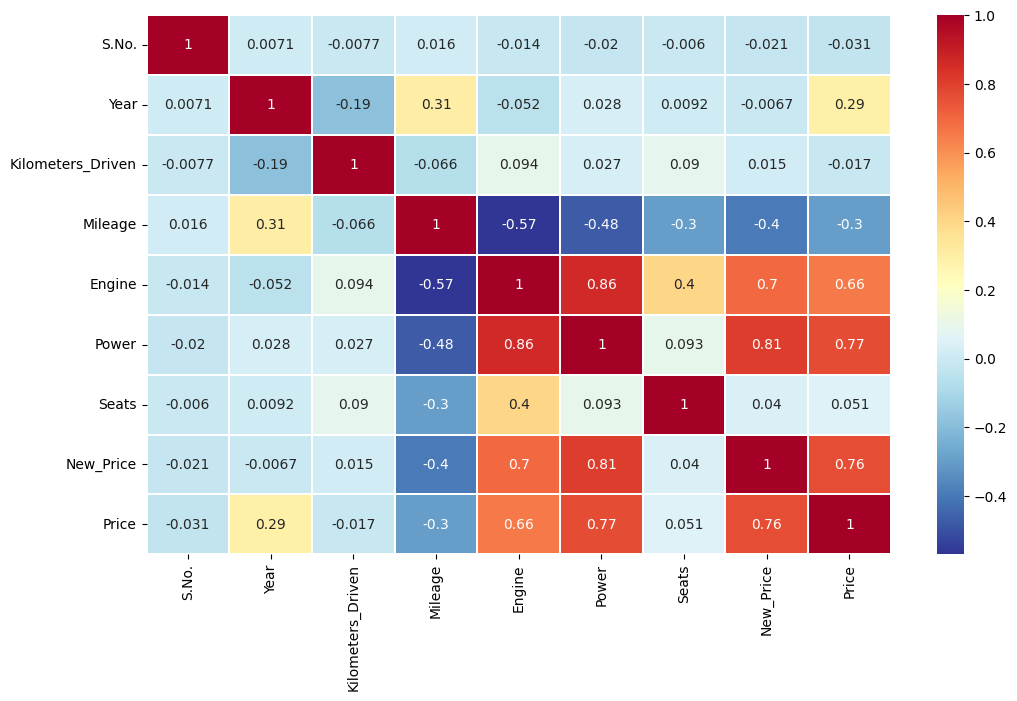

In [ ]:
#Checking for the corroletions
corr_ = df.corr()

plt.figure(figsize=(12, 7))

sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')

plt.show()

In [ ]:
df_numeric = df.select_dtypes(exclude = "object") # A variable created to contai
df_numeric

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price
0,0,2010,72000,37.24,998.0,58.16,5.0,5.51,1.750000
1,1,2015,41000,19.67,1582.0,126.20,5.0,16.06,12.500000
2,2,2011,46000,18.20,1199.0,88.70,5.0,8.61,4.500000
3,3,2012,87000,20.77,1248.0,88.76,7.0,11.27,6.000000
4,4,2013,40670,15.20,1968.0,140.80,5.0,53.14,17.740000
...,...,...,...,...,...,...,...,...,...
7244,7248,2011,89411,20.54,1598.0,103.60,5.0,13.23,3.966667
7245,7249,2015,59000,17.21,1197.0,103.60,5.0,10.15,6.891250
7246,7250,2012,28000,23.08,1461.0,63.10,5.0,9.47,3.264286
7247,7251,2013,52262,17.20,1197.0,103.60,5.0,10.15,6.891250


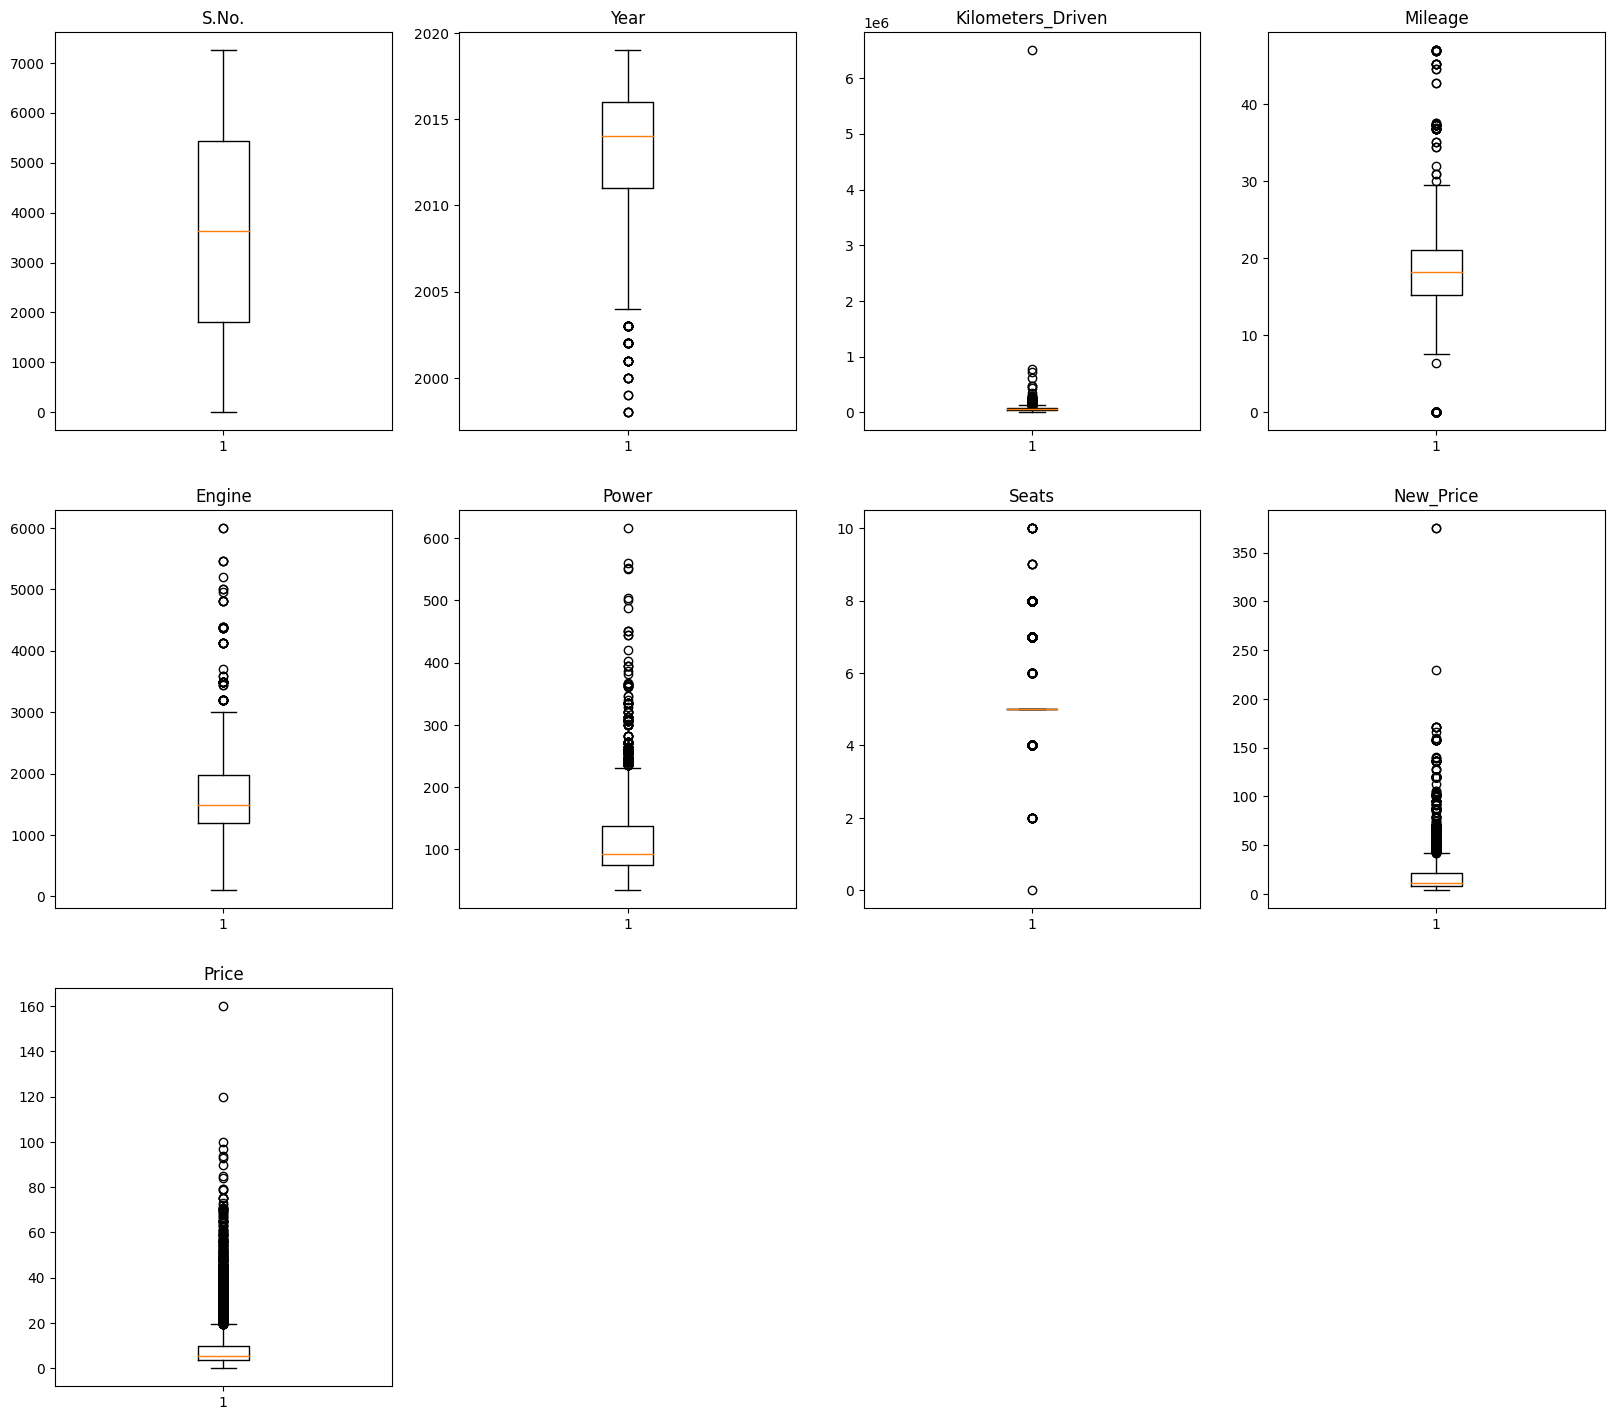

In [ ]:
#oUTLIER DETECTION

plt.figure(figsize = (20, 30))

for i, var in enumerate(df_numeric):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[var])
    plt.title(var);

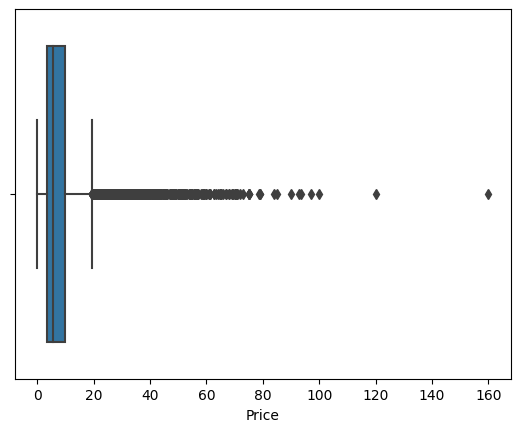

In [ ]:
sns.boxplot(data = df, x = 'Price');

In [ ]:
df['log_Price'] = np.log(df['Price']) + 1e-6

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


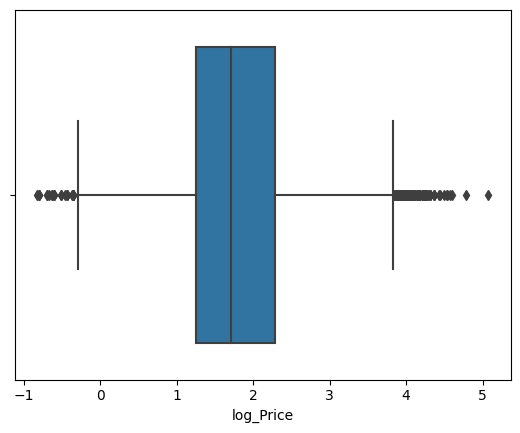

In [ ]:
sns.boxplot(data = df, x = 'log_Price');

In [ ]:
def treat_outliers(df, col):
    """
    treat outliers in variable
    col: str, name of the numerical variable
    df: dataframe
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75) # upper quantile
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df, c)
    return df

In [ ]:
df.select_dtypes(include = object)

,Name,Location,Fuel_Type,Transmission,Owner_Type,Vehicle_Brand,Vehicle_Model,Mil_unit
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,Maruti,Wagon R LXI CNG,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,Hyundai,Creta 1.6 CRDi SX Option,kmpl
2,Honda Jazz V,Chennai,Petrol,Manual,First,Honda,Jazz V,kmpl
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,Maruti,Ertiga VDI,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,Audi,A4 New 2.0 TDI Multitronic,kmpl
...,...,...,...,...,...,...,...,...
7244,Volkswagen Vento Diesel Trendline,Hyderabad,Diesel,Manual,First,Volkswagen,Vento Diesel Trendline,kmpl
7245,Volkswagen Polo GT TSI,Mumbai,Petrol,Automatic,First,Volkswagen,Polo GT TSI,kmpl
7246,Nissan Micra Diesel XV,Kolkata,Diesel,Manual,First,Nissan,Micra Diesel XV,kmpl
7247,Volkswagen Polo GT TSI,Pune,Petrol,Automatic,Third,Volkswagen,Polo GT TSI,kmpl


In [ ]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Vehicle_Brand', 'Vehicle_Model', 'Mil_unit',
       'log_Price', 'Most_Brand'],
      dtype='object')

In [ ]:
# Select features and target
X = df[['New_Price','Power','Engine','Year','Location','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type']]

y = df["Price"] #+ 1e-10   

In [ ]:
y

NameError: name 'y' is not defined

In [ ]:
# convert all categorical features to numerical data: OneHotEncoding

X = pd.get_dummies(X, drop_first = True)

X.head()

,New_Price,Power,Engine,Year,Kilometers_Driven,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,5.51,58.16,998.0,2010,72000,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,16.06,126.20,1582.0,2015,41000,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,8.61,88.70,1199.0,2011,46000,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,11.27,88.76,1248.0,2012,87000,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,53.14,140.80,1968.0,2013,40670,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#Splitting a data to test, train  
x_temp, x_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(4639, 22)

In [ ]:
x_test.shape

(1450, 22)

In [ ]:
x_val.shape

(1160, 22)

In [ ]:
scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)
x_val_sc = scaler.transform(x_val)

In [ ]:
#Model Building
li_reg = LinearRegression() #Creating the regressor instance

#Building the model
li_reg.fit(x_train_sc, y_train)

LinearRegression()

In [ ]:
pred_train = li_reg.predict(x_train_sc)

In [ ]:
print('Intercept:', li_reg.intercept_)
print('Coefficients:', np.exp(li_reg.coef_))

Intercept: 9.354726036612313
Coefficients: [81.57487908 67.52058405  1.36760185 13.32788343  0.41043504  1.50575354
  1.57145941  2.00144434  1.03198216  2.03027325  1.44725117  1.09833933
  0.77292778  0.89566637  1.3235997   0.82009442  1.03920558  0.44994034
  0.71663214  1.13580708  0.78319401  1.11888748]


In [ ]:
r2 = r2_score(y_train, pred_train)
# The mean squared error
mse = mean_squared_error(y_train, pred_train)
# The root mean squared error
rmse = np.sqrt(mse)
#rmse2 = mean_squared_error(y_test, y_pred, squared=False)
# The mean absolute error
mae = mean_absolute_error(y_train, pred_train)

In [ ]:
print('coefficient of determination (R-squared) is:', r2)
print('Mean Squared Error is:', mse)
print('Root Mean Squared Error is:', rmse)
#print('Root Mean Squared Error 2:', rmse)
print('Mean Absolute Error is:', mae)

coefficient of determination (R-squared) is: 0.7427177993819523
Mean Squared Error is: 31.49260458140615
Root Mean Squared Error is: 5.611827205234152
Mean Absolute Error is: 3.096802509543513


In [ ]:
pred_val = li_reg.predict(x_val_sc)

In [ ]:
r2_val = r2_score(y_val, pred_val)
# The mean squared error
mse_val = mean_squared_error(y_val, pred_val)
# The root mean squared error
rmse_val = np.sqrt(mse)
#rmse2 = mean_squared_error(y_test, y_pred, squared=False)
# The mean absolute error
mae_val = mean_absolute_error(y_val, pred_val)

In [ ]:
print('coefficient of determination (R-squared) is:', r2_val)
print('Mean Squared Error is:', mse_val)
print('Root Mean Squared Error is:', rmse_val)
#print('Root Mean Squared Error 2:', rmse)
print('Mean Absolute Error is:', mae_val)

coefficient of determination (R-squared) is: 0.7329591498992416
Mean Squared Error is: 27.58589521134905
Root Mean Squared Error is: 5.611827205234152
Mean Absolute Error is: 3.066814313704173


This model underfits because it did do well on both the testing and training dataset

In [ ]:
# import the Ridge algorithm
from sklearn.linear_model import Ridge

# instantiate the model
ridge = Ridge(random_state=0, alpha = 2)

# fit the model
ridge.fit(x_train_sc, y_train)

# observe the coefficients of the linear regression

Ridge(alpha=2, random_state=0)

In [ ]:
r_pred_train = ridge.predict(x_train_sc)

In [ ]:
r_r2 = r2_score(y_train, r_pred_train)
# The mean squared error
r_mse = mean_squared_error(y_train, r_pred_train)
# The root mean squared error
r_rmse = np.sqrt(mse)
#rmse2 = mean_squared_error(y_test, y_pred, squared=False)
# The mean absolute error
r_mae = mean_absolute_error(y_train, r_pred_train)

In [ ]:
print('coefficient of determination (R-squared) is:', r_r2)
print('Mean Squared Error is:', r_mse)
print('Root Mean Squared Error is:', r_rmse)
#print('Root Mean Squared Error 2:', rmse)
print('Mean Absolute Error is:', r_mae)

coefficient of determination (R-squared) is: 0.7427175918309024
Mean Squared Error is: 31.49262998667371
Root Mean Squared Error is: 5.611827205234152
Mean Absolute Error is: 3.0963800687313268


In [ ]:
r_pred_val = ridge.predict(x_val_sc)

In [ ]:
r_r2_val = r2_score(y_val, r_pred_val)
# The mean squared error
r_mse_val = mean_squared_error(y_val, r_pred_val)
# The root mean squared error
r_rmse_val = np.sqrt(r_mse_val)
#rmse2 = mean_squared_error(y_test, y_pred, squared=False)
# The mean absolute error
r_mae_val = mean_absolute_error(y_val, r_pred_val)

In [ ]:
print('coefficient of determination (R-squared) is:', r_r2_val)
print('Mean Squared Error is:', r_mse_val)
print('Root Mean Squared Error is:', r_rmse_val)
#print('Root Mean Squared Error 2:', rmse)
print('Mean Absolute Error is:', r_mae_val)

coefficient of determination (R-squared) is: 0.733030983438266
Mean Squared Error is: 27.578474651987293
Root Mean Squared Error is: 5.2515211750489295
Mean Absolute Error is: 3.066246658962379


In [ ]:
def fillprice(colname):
    col_n = (df['Name']== colname).sum()
    col_p = df.loc[(df['Name']== colname) & (df['Price']), 'Price'].sum()
    av_price = int(col_p) / int(col_n)
    colname = colname
for i in df['Price']:
    if i == colname:
        df.loc[(df['Name']== colname) & (df['Price']), 'Price'] = df.loc[(df['Name']== colname) & (df['Price']), 'Price'].fillna(av_price)                                    

In [ ]:
# av_price('Maruti Alto K10 LXI CNG')

In [ ]:
# def fillprice(colname, av_price):
#     df.loc[(df['Name']== 'colname') & (df['Price']), 'Price'] = df.loc[(df['Name']== 'colname') & (df['Price']), 'Price'].fillna(av_price, inplace=True)                   

In [ ]:
fillprice('Toyota Innova Crysta Touring Sport 2.4 MT', 1.0)

In [ ]:
df[df['Name']== 'Toyota Innova Crysta Touring Sport 2.4 MT']

In [ ]:
df[(df['Price'].isnull())]

In [ ]:
df.loc[(df['Name']== colname) & (df['Price']), 'Price'] = df.loc[(df['Name']== colname) & (df['Price']), 'Price'].fillna(av_price)

In [ ]:
def fillprice(colname):
    col_n = (df['Name']== colname).sum()
    col_p = df.loc[(df['Name']== colname) & (df['Price']), 'Price'].sum()
    av_price = int(col_p) / int(col_n)
    for i in df['Price']:
        if i == np.nan:
            df.loc[(df['Name']== colname) & (df['Price']), 'Price'] = df.loc[(df['Name']== colname) & (df['Price']), 'Price']= df.loc[(df['Name']== colname) & (df['Price']), 'Price'] = df.loc[(df['Name']== colname) & (df['Price']), 'Price'].fillna(av_price, inplace=True) 
    return df[df['Price'].isnull()]        

In [ ]:
fillprice(Fiat Punto 1.4 Emotion)

In [ ]:
fillprice('Maruti Alto 800 2016-2019 LXI')

In [ ]:
df[(df['Price'].isnull())] 

In [ ]:
fillprice('Volkswagen Polo GT TSI')